# Pentathlon: Next Product to Buy Models

* Team-lead GitHub userid: rsm-roguchi
* Group name: Group 2
* Team member names:
    - Rachel Wang
    - Jaqueline Vallejo 
    - Qiyong Zhang
    - Ryosuke Oguchi

## Setup

Please complete this python notebook with your group by answering the questions in `pentathlon-nptb.pdf`.

Create a Notebook with all your results and comments and push the Notebook to GitHub when your team is done. Make sure to connect the GitHub repo to GradeScope before the due date. All results MUST be reproducible (i.e., the TA and I must be able to recreate your output from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the RSM-MSBA docker container.

> Note: Please do not install any packages as part of your Jupyter Notebook submission

This is a group assignment and you will be using Git and GitHub. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's changes to accept. The team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitHub. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `question1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file
* If you are going to work simultaneously, do it in different notebooks, e.g.,
    - model1.ipynb, question1.ipynb, etc.
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:

![](images/github-group-workflow.png)

In [1]:
import pandas as pd
import pyrsm as rsm
import numpy as np
import os

In [2]:
# setup pyrsm for autoreload
%reload_ext autoreload
%autoreload 2
%aimport pyrsm

In [3]:
## loading the data - this dataset must NOT be changed
pentathlon_nptb = pd.read_parquet("data/pentathlon_nptb.parquet")
pentathlon_nptb.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,freq_strength,freq_water,freq_team,freq_backcountry,freq_racquet,training
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,4,0,4,0,1,1.0
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,0,0,1,0,0,0.0
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,0,0,0,2,2,1.0
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,0,0,0,0,0,1.0
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,2,0,0,2,2,0.0


In [4]:
# show dataset description
rsm.md("data/pentathlon_nptb_description.md")

## Pentathon: Next Product To Buy 

The available data is based on the last e-mail sent to each Pentathlon customer. Hence, an observation or row in the data is a "customer-promotional e-mail" pair. The data contains the following basic demographic information available to Pentathlon:

* "age": Customer age(coded in 4 buckets:"<30", "30 to 44", "45 to 59", and ">=60") 
* "female": Gender identity coded as Female "yes" or "no"
* "income": Income in Euros, rounded to the nearest EUR5,000
* "education": Percentage of college graduates in the customer's neighborhood, coded from 0-100
* "children": Average number of children in the customer's neighborhood

The data also contains basic historical information about customer purchases, specifically, a department-specific frequency measure.

* "freq_endurance-freq_racquet": Number of purchases in each department in the last year, excluding any purchase in response to the last email.

The key outcome variables are:

* "buyer": Did the customer click on the e-mail and complete a purchase within two days of receiving the e-mail ("yes" or "no")?
* "total_os": Total order size (in Euros) conditional on the customer having purchased (buyer == "yes"). This measures spending across all departments, not just the department that sent the message

> Note: In addition to the six message groups, a seventh group of customers received no promotional e-mails for the duration of the test ("control").

In [5]:
# show the content another notebook
rsm.md_notebook("./sub-notebooks/model1.ipynb")


# A sub-notebook for the main notebook
... insert text to describe the motivation for the model estimated below ...
```python
lrc = rsm.model.logistic(
    data={"pentathlon_nptb": pentathlon_nptb},
    rvar="buyer",
    lev="yes",
    evar=["message", "age"]
)
lrc.summary()
```
... insert text to describe the results estimated above ...
```python
print("Some printed text ...")
```
```python

```


In [6]:
# run python code from another notebook
%run ./sub-notebooks/model1.ipynb

Logistic regression (GLM)
Data                 : pentathlon_nptb
Response variable    : buyer
Level                : yes
Explanatory variables: message, age
Null hyp.: There is no effect of x on buyer
Alt. hyp.: There is an effect of x on buyer

                       OR     OR%  coefficient  std.error  z.value p.value     
Intercept           0.013  -98.7%       -4.337      0.034 -126.939  < .001  ***
message[control]    0.946   -5.4%       -0.055      0.032   -1.718   0.086    .
message[endurance]  1.109   10.9%        0.103      0.031    3.307  < .001  ***
message[racquet]    0.965   -3.5%       -0.036      0.032   -1.121   0.262     
message[strength]   1.063    6.3%        0.061      0.032    1.945   0.052    .
message[team]       1.024    2.4%        0.024      0.032    0.755    0.45     
message[water]      1.037    3.7%        0.036      0.032    1.146   0.252     
age[30 to 44]       2.421  142.1%        0.884      0.030   29.315  < .001  ***
age[45 to 59]       2.159  115.9% 

In [7]:
# importing functions from a module/package
from utils import functions

functions.example()


You just accessed a function from your first python packages!
Change the code in utils/function.py to whatever you need for this assignment
Use 'from utils import functions' to get access to your code
You can add modules to import from by adding additional .py files to the 'utils' directory
Note: If you make changes to the content of this file you will have to restart the notebook kernel to get the updates



In [8]:
pd.crosstab(pentathlon_nptb["buyer"], [pentathlon_nptb["training"]])

training,0.0,1.0
buyer,,
yes,4320,10080
no,175680,409920


In [9]:
pentathlon_nptb["buyer_yes"] = rsm.ifelse(pentathlon_nptb.buyer == "yes", 1, rsm.ifelse(pentathlon_nptb.buyer == "no", 0, pd.NA))
pentathlon_nptb.buyer_yes.value_counts(dropna=False)

buyer_yes
0    585600
1     14400
Name: count, dtype: int64

In [10]:
evar = pentathlon_nptb.columns.to_list()
evar = evar[evar.index("message"):]
evar = evar[:evar.index("training")]
evar

['message',
 'age',
 'female',
 'income',
 'education',
 'children',
 'freq_endurance',
 'freq_strength',
 'freq_water',
 'freq_team',
 'freq_backcountry',
 'freq_racquet']

In [11]:
pentathlon_nptb.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,freq_strength,freq_water,freq_team,freq_backcountry,freq_racquet,training,buyer_yes
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,4,0,4,0,1,1.0,0
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,0,0,1,0,0,0.0,0
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,0,0,0,2,2,1.0,0
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,0,0,0,0,0,1.0,0
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,2,0,0,2,2,0.0,0


In [12]:
age_mapping = {
    "< 30": 1,
    "30 to 44": 2,
    "45 to 59": 3,
    ">= 60": 4
}

pentathlon_nptb["age"] = pentathlon_nptb["age"].map(age_mapping)

In [13]:
pentathlon_nptb.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,freq_strength,freq_water,freq_team,freq_backcountry,freq_racquet,training,buyer_yes
0,U1,no,0,team,2,no,55000,19,0.8,0,4,0,4,0,1,1.0,0
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,0,0,1,0,0,0.0,0
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,0,0,0,2,2,1.0,0
3,U20,no,0,water,3,yes,25000,24,0.2,0,0,0,0,0,0,1.0,0
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,2,0,0,2,2,0.0,0


# Logistic Regression

In [14]:
clf = rsm.model.logistic(
    data={"pentathlon_nptb": pentathlon_nptb[pentathlon_nptb.training == 1]},
    rvar="buyer",
    lev="yes",
    evar=evar
)
clf.summary(vif=True)

Logistic regression (GLM)
Data                 : pentathlon_nptb
Response variable    : buyer
Level                : yes
Explanatory variables: message, age, female, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Null hyp.: There is no effect of x on buyer
Alt. hyp.: There is an effect of x on buyer

                       OR      OR%  coefficient  std.error  z.value p.value     
Intercept           0.000  -100.0%       -8.283      0.064 -128.837  < .001  ***
message[control]    0.906    -9.4%       -0.098      0.042   -2.335    0.02    *
message[endurance]  1.250    25.0%        0.223      0.041    5.462  < .001  ***
message[racquet]    0.993    -0.7%       -0.007      0.042   -0.171   0.864     
message[strength]   1.162    16.2%        0.150      0.041    3.660  < .001  ***
message[team]       1.035     3.5%        0.034      0.041    0.823    0.41     
message[water]      1.056     5.6%        0.055      0.042    1.

In [15]:
pentathlon_nptb['pred_logit_buyer'] = clf.predict(pentathlon_nptb)['prediction']

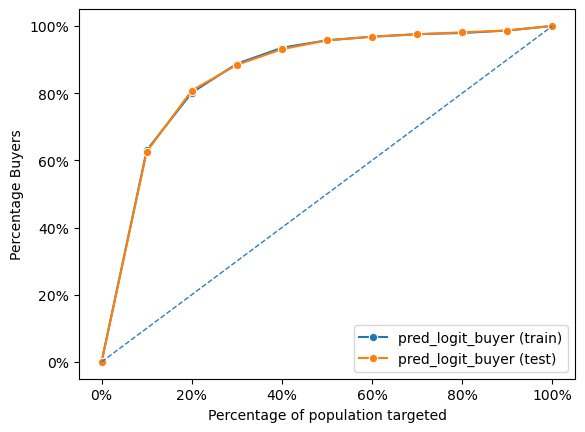

In [16]:
dct = {
    "train": pentathlon_nptb[pentathlon_nptb.training==1],
    "test": pentathlon_nptb[pentathlon_nptb.training==0]
}
fig = rsm.gains_plot(dct, rvar='buyer', lev='yes', pred='pred_logit_buyer')

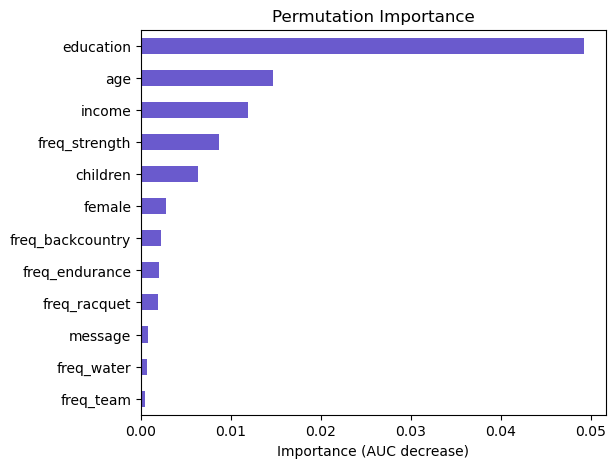

In [17]:
clf.plot("vimp")

Under a base logistic regression, the model must be check for any evidence of over/underfitting regardless of the AUC score in the logit model that was created. Overall, we see an AUC of 0.884 which indicates that the model is doing a good job of separating out a buyer from a nonbuyer based off of the explanatory variable that was given. Moreover, we can see in the gains plot that for both the test and train data, the model performs almost identically. This means that the model can be used for deployment to determine a predicted probabilty of a customer being a buyer based off of a targeted message.

## Q1

In [18]:
pentathlon_nptb["p_back"] = clf.predict(pentathlon_nptb, data_cmd={"message": "backcountry"})["prediction"]
pentathlon_nptb["p_control"] = clf.predict(pentathlon_nptb, data_cmd={"message": "control"})["prediction"]
pentathlon_nptb["p_end"] = clf.predict(pentathlon_nptb, data_cmd={"message": "endurance"})["prediction"]
pentathlon_nptb["p_rac"] = clf.predict(pentathlon_nptb, data_cmd={"message": "racquet"})["prediction"]
pentathlon_nptb["p_str"] = clf.predict(pentathlon_nptb, data_cmd={"message": "strength"})["prediction"]
pentathlon_nptb["p_team"] = clf.predict(pentathlon_nptb, data_cmd={"message": "team"})["prediction"]
pentathlon_nptb["p_water"] = clf.predict(pentathlon_nptb, data_cmd={"message": "water"})["prediction"]
pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,training,buyer_yes,pred_logit_buyer,p_back,p_control,p_end,p_rac,p_str,p_team,p_water
0,U1,no,0,team,2,no,55000,19,0.8,0,...,1.0,0,0.013031,0.012601,0.011433,0.015700,0.012512,0.014615,0.013031,0.013298
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,...,0.0,0,0.005123,0.005123,0.004645,0.006395,0.005086,0.005949,0.005299,0.005408
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,...,1.0,0,0.011948,0.009582,0.008692,0.011948,0.009515,0.011120,0.009910,0.010114
3,U20,no,0,water,3,yes,25000,24,0.2,0,...,1.0,0,0.002361,0.002236,0.002027,0.002793,0.002220,0.002598,0.002313,0.002361
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,...,0.0,0,0.011717,0.011800,0.010706,0.014705,0.011717,0.013688,0.012203,0.012453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,4,yes,40000,26,0.6,0,...,1.0,0,0.002182,0.002067,0.001873,0.002582,0.002052,0.002401,0.002138,0.002182
599996,U3462900,no,0,team,1,no,55000,32,0.9,3,...,0.0,0,0.007347,0.007103,0.006442,0.008863,0.007053,0.008247,0.007347,0.007499
599997,U3462902,no,0,team,1,yes,55000,32,0.9,0,...,1.0,0,0.009142,0.008839,0.008017,0.011023,0.008776,0.010258,0.009142,0.009330
599998,U3462916,no,0,team,1,no,50000,35,0.6,2,...,0.0,0,0.006615,0.006395,0.005799,0.007981,0.006350,0.007425,0.006615,0.006751


In [19]:
pentathlon_nptb["to_message"] = pentathlon_nptb[["p_back", "p_control", "p_end", "p_rac", "p_str", "p_team", "p_water"]].idxmax(axis=1) # what is the thing has highest probability to respond to
pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,buyer_yes,pred_logit_buyer,p_back,p_control,p_end,p_rac,p_str,p_team,p_water,to_message
0,U1,no,0,team,2,no,55000,19,0.8,0,...,0,0.013031,0.012601,0.011433,0.015700,0.012512,0.014615,0.013031,0.013298,p_end
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,...,0,0.005123,0.005123,0.004645,0.006395,0.005086,0.005949,0.005299,0.005408,p_end
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,...,0,0.011948,0.009582,0.008692,0.011948,0.009515,0.011120,0.009910,0.010114,p_end
3,U20,no,0,water,3,yes,25000,24,0.2,0,...,0,0.002361,0.002236,0.002027,0.002793,0.002220,0.002598,0.002313,0.002361,p_end
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,...,0,0.011717,0.011800,0.010706,0.014705,0.011717,0.013688,0.012203,0.012453,p_end
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,4,yes,40000,26,0.6,0,...,0,0.002182,0.002067,0.001873,0.002582,0.002052,0.002401,0.002138,0.002182,p_end
599996,U3462900,no,0,team,1,no,55000,32,0.9,3,...,0,0.007347,0.007103,0.006442,0.008863,0.007053,0.008247,0.007347,0.007499,p_end
599997,U3462902,no,0,team,1,yes,55000,32,0.9,0,...,0,0.009142,0.008839,0.008017,0.011023,0.008776,0.010258,0.009142,0.009330,p_end
599998,U3462916,no,0,team,1,no,50000,35,0.6,2,...,0,0.006615,0.006395,0.005799,0.007981,0.006350,0.007425,0.006615,0.006751,p_end


In [20]:
repl={"p_back": "backcountry", "p_control": "control", "p_end": "endurance", "p_rac": "racquet", "p_str": "strength", "p_team": "team", "p_water": "water"}
pentathlon_nptb["to_message"] = (
    pentathlon_nptb[["p_back", "p_control", "p_end", "p_rac", "p_str", "p_team", "p_water"]]
    .idxmax(axis=1)
    .map(repl)
)
pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,buyer_yes,pred_logit_buyer,p_back,p_control,p_end,p_rac,p_str,p_team,p_water,to_message
0,U1,no,0,team,2,no,55000,19,0.8,0,...,0,0.013031,0.012601,0.011433,0.015700,0.012512,0.014615,0.013031,0.013298,endurance
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,...,0,0.005123,0.005123,0.004645,0.006395,0.005086,0.005949,0.005299,0.005408,endurance
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,...,0,0.011948,0.009582,0.008692,0.011948,0.009515,0.011120,0.009910,0.010114,endurance
3,U20,no,0,water,3,yes,25000,24,0.2,0,...,0,0.002361,0.002236,0.002027,0.002793,0.002220,0.002598,0.002313,0.002361,endurance
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,...,0,0.011717,0.011800,0.010706,0.014705,0.011717,0.013688,0.012203,0.012453,endurance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,4,yes,40000,26,0.6,0,...,0,0.002182,0.002067,0.001873,0.002582,0.002052,0.002401,0.002138,0.002182,endurance
599996,U3462900,no,0,team,1,no,55000,32,0.9,3,...,0,0.007347,0.007103,0.006442,0.008863,0.007053,0.008247,0.007347,0.007499,endurance
599997,U3462902,no,0,team,1,yes,55000,32,0.9,0,...,0,0.009142,0.008839,0.008017,0.011023,0.008776,0.010258,0.009142,0.009330,endurance
599998,U3462916,no,0,team,1,no,50000,35,0.6,2,...,0,0.006615,0.006395,0.005799,0.007981,0.006350,0.007425,0.006615,0.006751,endurance


In [21]:
pentathlon_nptb["p_max"] = pentathlon_nptb[["p_back", "p_control", "p_end", "p_rac", "p_str", "p_team", "p_water"]].max(axis=1)

In [22]:
pentathlon_nptb.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,pred_logit_buyer,p_back,p_control,p_end,p_rac,p_str,p_team,p_water,to_message,p_max
0,U1,no,0,team,2,no,55000,19,0.8,0,...,0.013031,0.012601,0.011433,0.015700,0.012512,0.014615,0.013031,0.013298,endurance,0.015700
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,...,0.005123,0.005123,0.004645,0.006395,0.005086,0.005949,0.005299,0.005408,endurance,0.006395
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,...,0.011948,0.009582,0.008692,0.011948,0.009515,0.011120,0.009910,0.010114,endurance,0.011948
3,U20,no,0,water,3,yes,25000,24,0.2,0,...,0.002361,0.002236,0.002027,0.002793,0.002220,0.002598,0.002313,0.002361,endurance,0.002793
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,...,0.011717,0.011800,0.010706,0.014705,0.011717,0.013688,0.012203,0.012453,endurance,0.014705


In [23]:
pd.crosstab(index=pentathlon_nptb[pentathlon_nptb.training == 0].to_message, columns="count").apply(rsm.format_nr)

col_0,count
to_message,
endurance,"180,000"


Although the model was ready for deployment, we can observe here that a generalized probability will create a predictions for an endurance based message to be sent out. However, to incorporate customization to maximize a probability of purchase, we would need to interact the type of offer with all available customer characteristics. Hence, interaction varaibles will be created for all the explanatory variables we have.

In [24]:
ivar=[f"{e}:message" for e in evar if e != "message"]
ivar

['age:message',
 'female:message',
 'income:message',
 'education:message',
 'children:message',
 'freq_endurance:message',
 'freq_strength:message',
 'freq_water:message',
 'freq_team:message',
 'freq_backcountry:message',
 'freq_racquet:message']

In [25]:
# interact message with all other variables that are in the dataset
clf_int = rsm.model.logistic(
    data={"pentathlon_nptb": pentathlon_nptb[pentathlon_nptb.training == 1]},
    rvar="buyer",
    lev="yes",
    evar=evar,
    ivar=ivar
)
clf_int.summary()

Logistic regression (GLM)
Data                 : pentathlon_nptb
Response variable    : buyer
Level                : yes
Explanatory variables: message, age, female, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Null hyp.: There is no effect of x on buyer
Alt. hyp.: There is an effect of x on buyer

                                        OR      OR%  coefficient  std.error  z.value p.value     
Intercept                            0.000  -100.0%       -8.251      0.153  -53.948  < .001  ***
message[control]                     1.115    11.5%        0.109      0.220    0.496    0.62     
message[endurance]                   1.199    19.9%        0.181      0.213    0.850   0.395     
message[racquet]                     1.084     8.4%        0.080      0.217    0.370   0.711     
message[strength]                    0.959    -4.1%       -0.042      0.216   -0.195   0.846     
message[team]                        0.881 

In [26]:
pentathlon_nptb['pred_logit_int_buyer'] = clf_int.predict(pentathlon_nptb)['prediction']

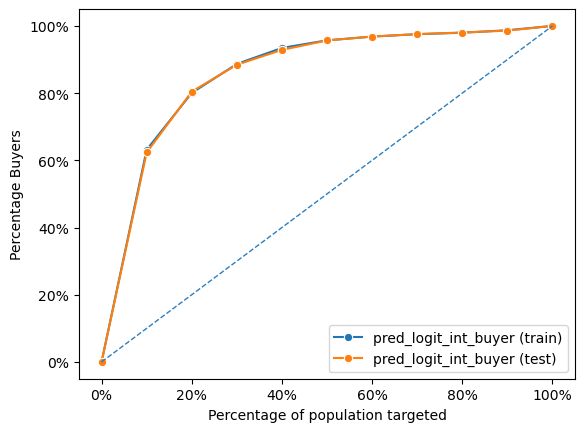

In [27]:
dct = {
    "train": pentathlon_nptb[pentathlon_nptb.training==1],
    "test": pentathlon_nptb[pentathlon_nptb.training==0]
}
fig = rsm.gains_plot(dct, rvar='buyer', lev='yes', pred='pred_logit_int_buyer')

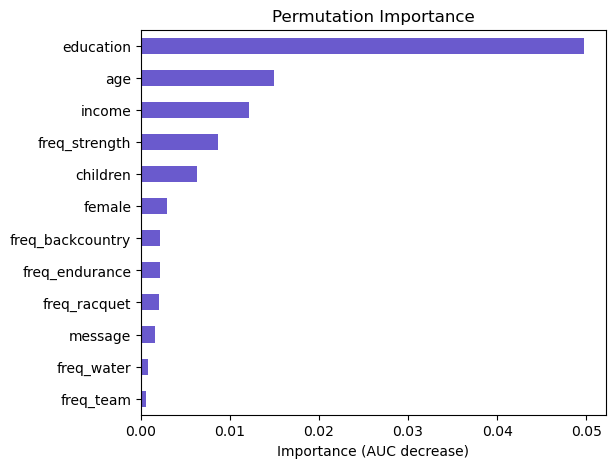

In [28]:
clf_int.plot("vimp")

By creating a new model with these interaction variables, we see that the predicted probability of buyer can still be well predicted as per the gains plot. Even across unseen data, the model appears to perform identically to the train data, which is a good sign when trying to determine a probability of a buyer. With these facts in mind, we can now generate new probabilities upon how people will respond when a certain type of offer is sent to a specific individual.

In [29]:
pentathlon_nptb["p_backi"] = clf_int.predict(pentathlon_nptb, data_cmd={"message": "backcountry"})["prediction"]
pentathlon_nptb["p_controli"] = clf_int.predict(pentathlon_nptb, data_cmd={"message": "control"})["prediction"]
pentathlon_nptb["p_endi"] = clf_int.predict(pentathlon_nptb, data_cmd={"message": "endurance"})["prediction"]
pentathlon_nptb["p_raci"] = clf_int.predict(pentathlon_nptb, data_cmd={"message": "racquet"})["prediction"]
pentathlon_nptb["p_stri"] = clf_int.predict(pentathlon_nptb, data_cmd={"message": "strength"})["prediction"]
pentathlon_nptb["p_teami"] = clf_int.predict(pentathlon_nptb, data_cmd={"message": "team"})["prediction"]
pentathlon_nptb["p_wateri"] = clf_int.predict(pentathlon_nptb, data_cmd={"message": "water"})["prediction"]
pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,to_message,p_max,pred_logit_int_buyer,p_backi,p_controli,p_endi,p_raci,p_stri,p_teami,p_wateri
0,U1,no,0,team,2,no,55000,19,0.8,0,...,endurance,0.015700,0.012008,0.011131,0.012022,0.015682,0.014499,0.015452,0.012008,0.012604
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,...,endurance,0.006395,0.005556,0.005556,0.004605,0.006014,0.005858,0.005475,0.005279,0.004981
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,...,endurance,0.011948,0.013884,0.010718,0.009140,0.013884,0.008789,0.009343,0.009533,0.009680
3,U20,no,0,water,3,yes,25000,24,0.2,0,...,endurance,0.002793,0.002389,0.002339,0.002252,0.002970,0.002089,0.002196,0.002264,0.002389
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,...,endurance,0.014705,0.012039,0.011526,0.010784,0.019675,0.012039,0.011463,0.011119,0.011437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,4,yes,40000,26,0.6,0,...,endurance,0.002582,0.002042,0.001947,0.001966,0.003217,0.002118,0.002089,0.001946,0.002042
599996,U3462900,no,0,team,1,no,55000,32,0.9,3,...,endurance,0.008863,0.007692,0.007884,0.006959,0.007731,0.008257,0.008117,0.007692,0.005832
599997,U3462902,no,0,team,1,yes,55000,32,0.9,0,...,endurance,0.011023,0.008225,0.010062,0.008535,0.011345,0.008976,0.009822,0.008225,0.008286
599998,U3462916,no,0,team,1,no,50000,35,0.6,2,...,endurance,0.007981,0.006796,0.007164,0.006378,0.006971,0.007352,0.007284,0.006796,0.005272


In [30]:
repl={"p_backi": "backcountry", "p_controli": "control", "p_endi": "endurance", "p_raci": "racquet", "p_stri": "strength", "p_teami": "team", "p_wateri": "water"}
pentathlon_nptb["to_messagei"] = (
    pentathlon_nptb[["p_backi", "p_controli", "p_endi", "p_raci", "p_stri", "p_teami", "p_wateri"]]
    .idxmax(axis=1)
    .map(repl)
)
pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,p_max,pred_logit_int_buyer,p_backi,p_controli,p_endi,p_raci,p_stri,p_teami,p_wateri,to_messagei
0,U1,no,0,team,2,no,55000,19,0.8,0,...,0.015700,0.012008,0.011131,0.012022,0.015682,0.014499,0.015452,0.012008,0.012604,endurance
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,...,0.006395,0.005556,0.005556,0.004605,0.006014,0.005858,0.005475,0.005279,0.004981,endurance
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,...,0.011948,0.013884,0.010718,0.009140,0.013884,0.008789,0.009343,0.009533,0.009680,endurance
3,U20,no,0,water,3,yes,25000,24,0.2,0,...,0.002793,0.002389,0.002339,0.002252,0.002970,0.002089,0.002196,0.002264,0.002389,endurance
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,...,0.014705,0.012039,0.011526,0.010784,0.019675,0.012039,0.011463,0.011119,0.011437,endurance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,4,yes,40000,26,0.6,0,...,0.002582,0.002042,0.001947,0.001966,0.003217,0.002118,0.002089,0.001946,0.002042,endurance
599996,U3462900,no,0,team,1,no,55000,32,0.9,3,...,0.008863,0.007692,0.007884,0.006959,0.007731,0.008257,0.008117,0.007692,0.005832,racquet
599997,U3462902,no,0,team,1,yes,55000,32,0.9,0,...,0.011023,0.008225,0.010062,0.008535,0.011345,0.008976,0.009822,0.008225,0.008286,endurance
599998,U3462916,no,0,team,1,no,50000,35,0.6,2,...,0.007981,0.006796,0.007164,0.006378,0.006971,0.007352,0.007284,0.006796,0.005272,racquet


In [31]:
pentathlon_nptb["p_maxi"] = pentathlon_nptb[["p_backi", "p_controli", "p_endi", "p_raci", "p_stri", "p_teami", "p_wateri"]].max(axis=1)

In [32]:
pentathlon_nptb.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,pred_logit_int_buyer,p_backi,p_controli,p_endi,p_raci,p_stri,p_teami,p_wateri,to_messagei,p_maxi
0,U1,no,0,team,2,no,55000,19,0.8,0,...,0.012008,0.011131,0.012022,0.015682,0.014499,0.015452,0.012008,0.012604,endurance,0.015682
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,...,0.005556,0.005556,0.004605,0.006014,0.005858,0.005475,0.005279,0.004981,endurance,0.006014
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,...,0.013884,0.010718,0.009140,0.013884,0.008789,0.009343,0.009533,0.009680,endurance,0.013884
3,U20,no,0,water,3,yes,25000,24,0.2,0,...,0.002389,0.002339,0.002252,0.002970,0.002089,0.002196,0.002264,0.002389,endurance,0.002970
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,...,0.012039,0.011526,0.010784,0.019675,0.012039,0.011463,0.011119,0.011437,endurance,0.019675


With newly generated probabilities, the firm now has proper insight in how they should customize their messaging based off a logistic regression. Moreover, by generating the greatest probability across all categories, we can now set up expected profit calculations.

Overall:
* We created a logistic regression model that properly considered interactions between customer characteristics and the type of offer being sent out.
* Using these interacted probabilities we are able to generate the category of the offer that the firm can send out to maximize the probability of purchase.
* Moreover, these probabilities serve as a key component in attempting to calculate expected profit.

# Q2.

In [33]:
message_counts = pd.crosstab(index=pentathlon_nptb[pentathlon_nptb.training == 0].to_messagei, columns="count").apply(rsm.format_nr)
message_counts

col_0,count
to_messagei,
backcountry,"1,447"
endurance,"125,861"
racquet,"12,299"
strength,"36,584"
team,"1,680"
water,"2,129"


From before, we can view the distribution of the types of offers that should be sent out based off the interactions we created.

In [34]:
pentathlon_nptb[pentathlon_nptb['training'] == 0]['to_messagei'].value_counts(normalize=True)

to_messagei
endurance      0.699228
strength       0.203244
racquet        0.068328
water          0.011828
team           0.009333
backcountry    0.008039
Name: proportion, dtype: float64

Moreover, we can view how the expected purchase probability will differ across category will look like if only type of offer (or no offer) vs the best category. As expected, being able to create customized messaging allows people to the firm to boost purchase probability rather than committing to 1 category. Moreover, we can see that doing nothing will not help the firm either.

## Expected Profit

## Q3.

Now, calculate the expected profit for each book and each customer (i.e., the predicted purchase probability * margin on sale). Lets use the prefix `ep_` for these variables, short for "Expected Profit"

In [35]:
COGS = 0.60
profit = (1-COGS)

In [36]:
# baseline
expected_order_size = pentathlon_nptb[pentathlon_nptb["buyer"] == "yes"].groupby("message", observed=False)["total_os"].mean()
expected_order_size

message
backcountry    62.497797
control        49.944559
endurance      55.047200
racquet        57.847552
strength       56.072927
team           57.592734
water          62.393837
Name: total_os, dtype: float64

We consider a baseline case by seeing just taking average. However, we want to do something more intuitive than taking an average. Given the customer characteristics, we want to predict the total order size each unique individual will commit to. In sub-notebook os_prediction_test we will see that across various regression models, there are not too many underlying factors that will favor 1 model over another. However, as there is at least 10% $R^2$ in every model (which is better than just taking a baseline, we should only use the baseline if $R^2 = 0$), we will choose the most basic model that will also avoid overfitting.

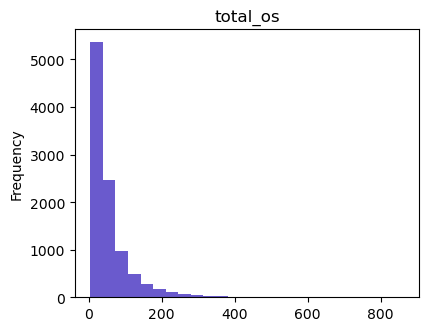

In [37]:
rsm.distr_plot(pentathlon_nptb.query('training==1 & buyer=="yes"')['total_os'])

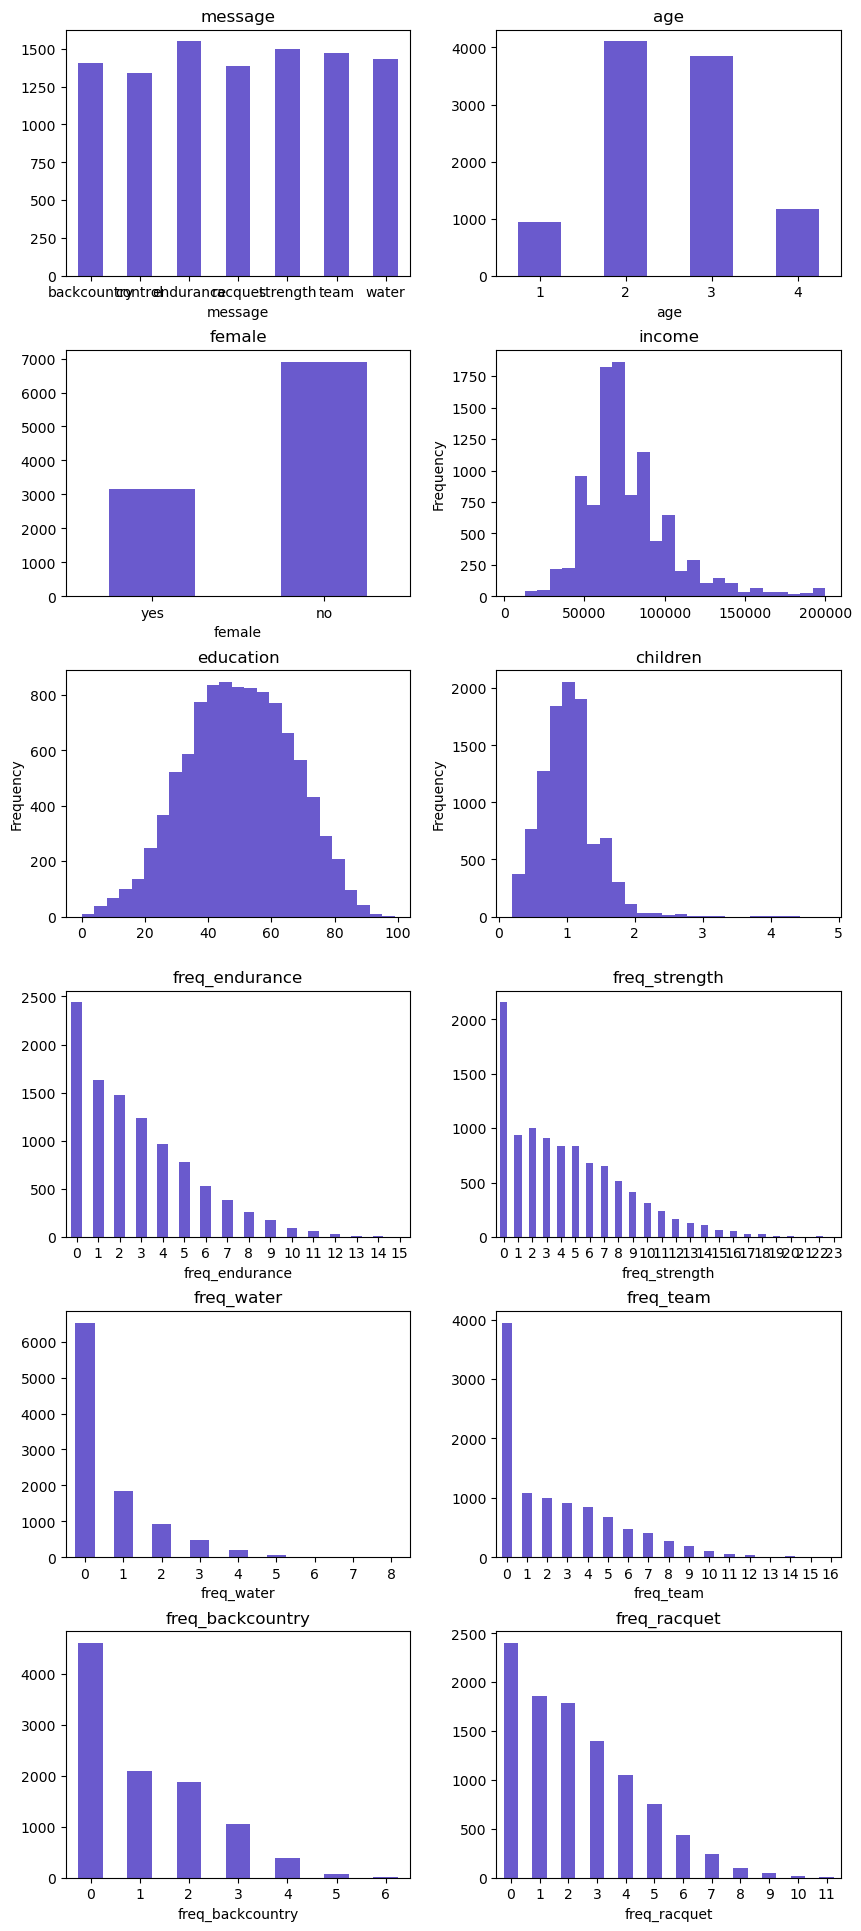

In [38]:
rsm.distr_plot(pentathlon_nptb.query('training==1 & buyer=="yes"')[evar])

In [39]:
pentathlon_nptb = (
    pentathlon_nptb.assign(total_os_ln = np.log1p(pentathlon_nptb.total_os),
                           income_ln=np.log1p(pentathlon_nptb.income),
                           children_ln=np.log1p(pentathlon_nptb.children),
                           freq_endurance_ln=np.log1p(pentathlon_nptb.freq_endurance),
                           freq_strength_ln = np.log1p(pentathlon_nptb.freq_strength),
                           freq_water_ln = np.log1p(pentathlon_nptb.freq_water),
                           freq_team_ln = np.log1p(pentathlon_nptb.freq_team),
                           freq_backcountry_ln = np.log1p(pentathlon_nptb.freq_backcountry),
                           freq_racquet_ln = np.log1p(pentathlon_nptb.freq_racquet)
                           )
)
pentathlon_nptb.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,p_maxi,total_os_ln,income_ln,children_ln,freq_endurance_ln,freq_strength_ln,freq_water_ln,freq_team_ln,freq_backcountry_ln,freq_racquet_ln
0,U1,no,0,team,2,no,55000,19,0.8,0,...,0.015682,0.0,10.915107,0.587787,0.000000,1.609438,0.0,1.609438,0.000000,0.693147
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,...,0.006014,0.0,10.463132,0.693147,0.000000,0.000000,0.0,0.693147,0.000000,0.000000
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,...,0.013884,0.0,10.714440,0.530628,0.000000,0.000000,0.0,0.000000,1.098612,1.098612
3,U20,no,0,water,3,yes,25000,24,0.2,0,...,0.002970,0.0,10.126671,0.182322,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,...,0.019675,0.0,11.082158,0.741937,0.693147,1.098612,0.0,0.000000,1.098612,1.098612


In [ ]:
evar2 = ['message', 'age', 'female', 'income_ln', 'education', 'children_ln', 'freq_endurance_ln', 'freq_strength_ln', 'freq_water_ln', 'freq_team_ln', 'freq_backcountry_ln', 'freq_racquet_ln']

In [41]:
ivar2=[f"{e}:message" for e in evar2 if e != "message"]

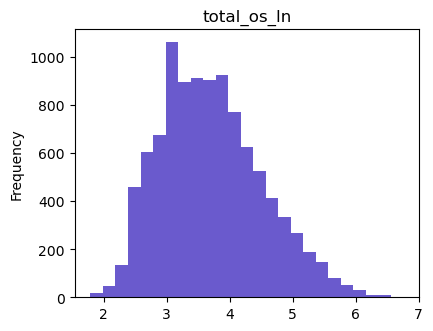

In [42]:
rsm.distr_plot(pentathlon_nptb.query('training==1 & buyer=="yes"')['total_os_ln'])

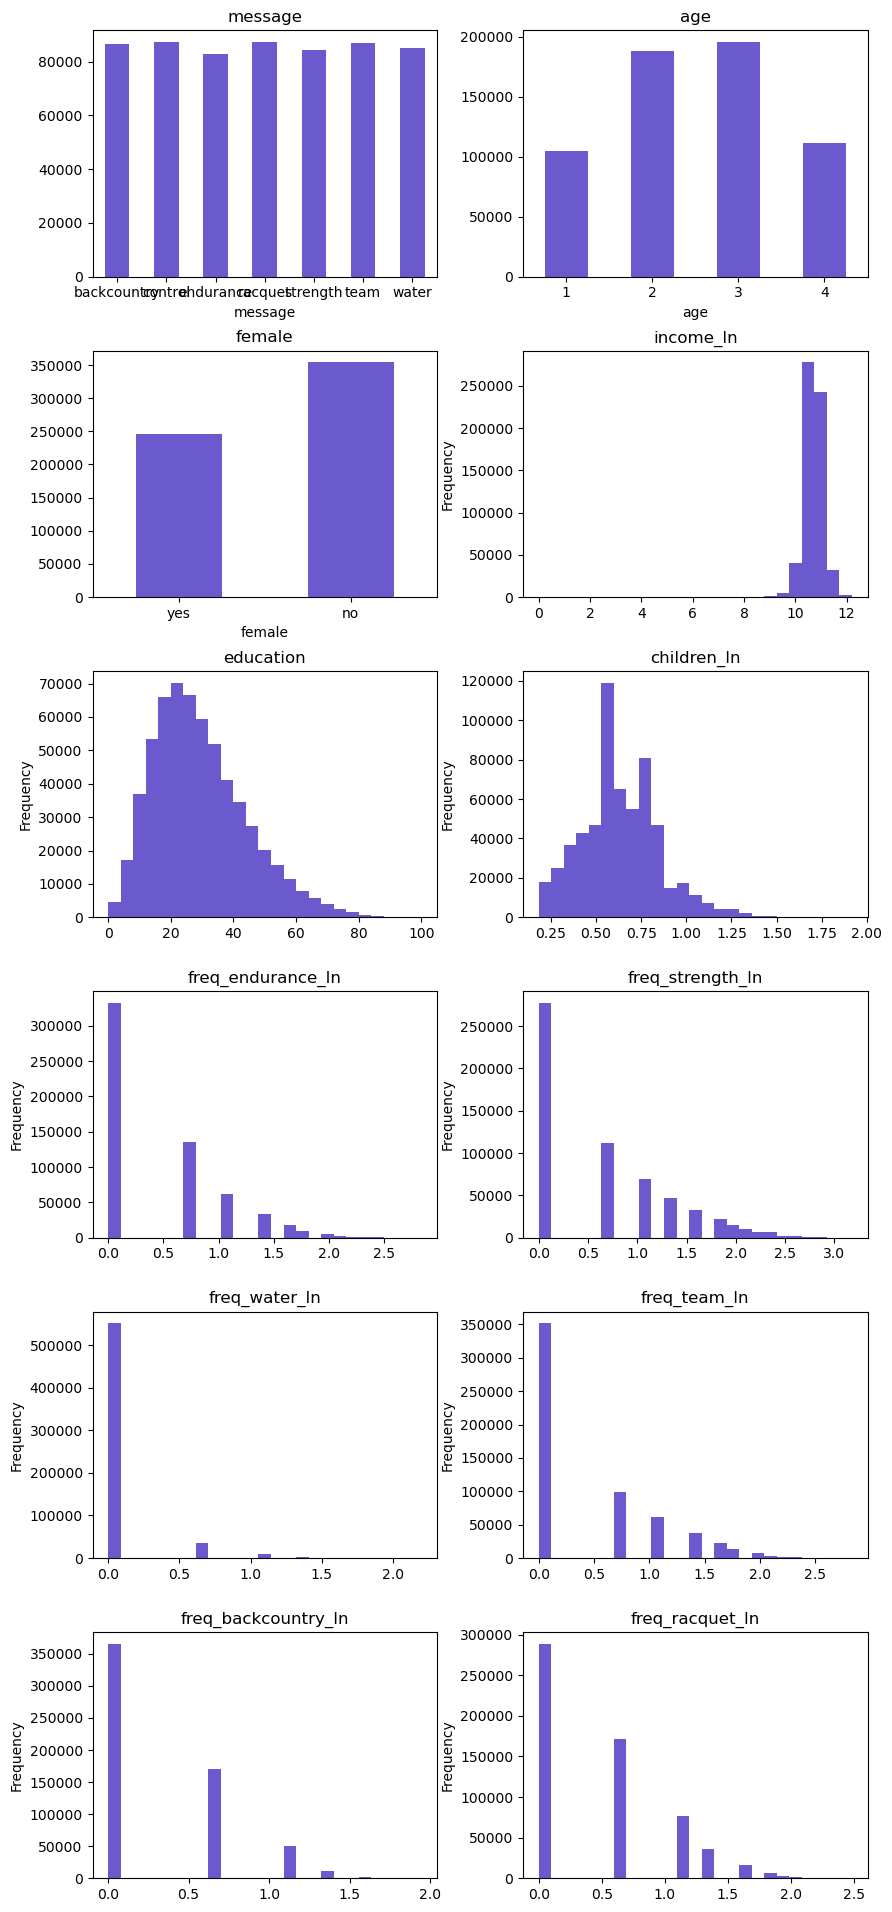

In [43]:
rsm.distr_plot(pentathlon_nptb[evar2])

Across many of the explanatory variables, we see that many of the variables are skewed, so it is necessary to log transform all the values to ensure the linearity assumptions are held across the linear regression model. Moreover, we will introduce the message interactions in this linear regressions as well for the same reasons we introduced them in the logistic regression. It should be relevant the customized messages to different customers should illicit different results and it is necessary to capture those in the order size prediction as well.

In [171]:
lr_order = rsm.model.regress(
    data={'pentathlon_nptb': pentathlon_nptb.query('training == 1 & buyer == "yes"')},
    rvar='total_os_ln',
    evar=evar2,
    ivar=ivar2
)
lr_order.summary(main=False)


R-squared: 0.135, Adjusted R-squared: 0.127
F-statistic: 16.054 df(97, 9982), p.value < 0.001
Nr obs: 10,080


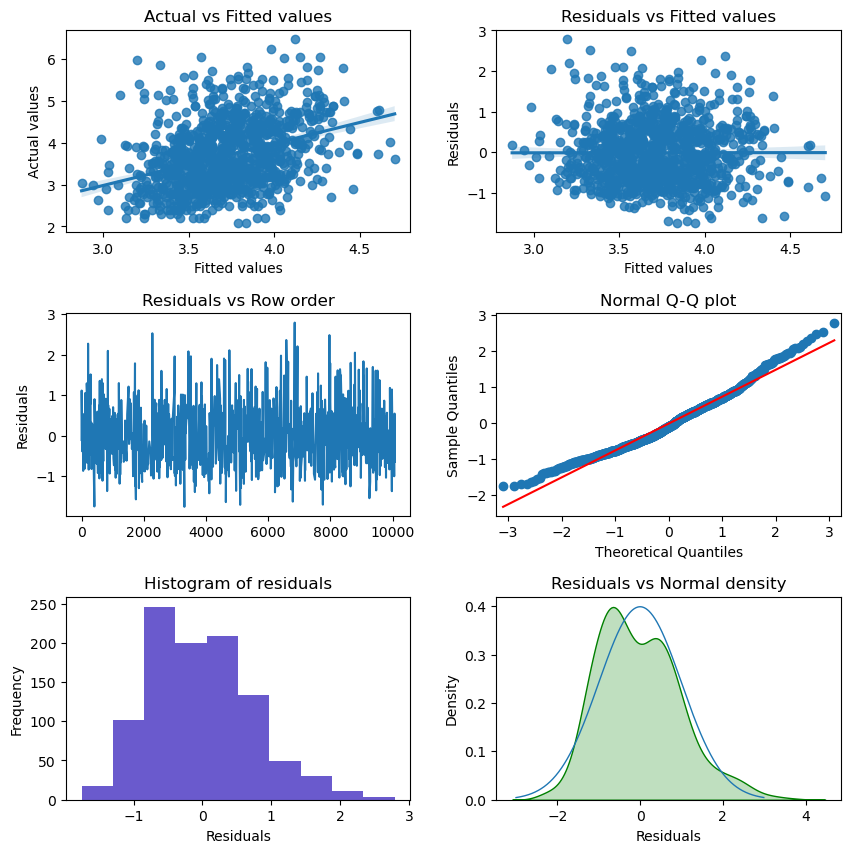

In [45]:
lr_order.plot('dashboard')

Consider the shape of the dashboard, we will see that the linearity assumptions are upheld, and the model is ready to be used for prediction. Although the $R^2$ is low, at 0.135, it is a boost relative to a model without interaction terms. However, it is important to note here that the model is only actionable on buyers only. (Or the regression model will created expected order sizes of 0 or close to zero). So the model is built upon only buyers and they will be expressed in log form. To predict the actual order size, it is necessary to convert it back by exponentiation. It is worth noting that direct exponentiation is just a mere, yet sufficient, estimation of order size. For our purposes, it is necessary to determine order size based off if a certain category is committed to. Similar to probability, we will extract the maximum expected order size to see how customization should play a part.

In [46]:
pentathlon_nptb['pred_os_backcountry'] = np.exp(lr_order.predict(pentathlon_nptb.assign(message='backcountry'))['prediction'])
pentathlon_nptb['pred_os_endurance'] = np.exp(lr_order.predict(pentathlon_nptb.assign(message='endurance'))['prediction'])
pentathlon_nptb['pred_os_racquet'] = np.exp(lr_order.predict(pentathlon_nptb.assign(message='racquet'))['prediction'])
pentathlon_nptb['pred_os_strength'] = np.exp(lr_order.predict(pentathlon_nptb.assign(message='strength'))['prediction'])
pentathlon_nptb['pred_os_team'] = np.exp(lr_order.predict(pentathlon_nptb.assign(message='team'))['prediction'])
pentathlon_nptb['pred_os_water'] = np.exp(lr_order.predict(pentathlon_nptb.assign(message='water'))['prediction'])
pentathlon_nptb['pred_os_control'] = np.exp(lr_order.predict(pentathlon_nptb.assign(message='control'))['prediction'])

In [47]:
pentathlon_nptb['ep_backcountry'] = pentathlon_nptb.pred_os_backcountry * pentathlon_nptb.p_backi * profit
pentathlon_nptb['ep_endurance'] =  pentathlon_nptb.pred_os_endurance * pentathlon_nptb.p_endi * profit
pentathlon_nptb['ep_racquet'] =  pentathlon_nptb.pred_os_racquet * pentathlon_nptb.p_raci * profit
pentathlon_nptb['ep_strength'] =  pentathlon_nptb.pred_os_strength * pentathlon_nptb.p_stri * profit
pentathlon_nptb['ep_team'] =  pentathlon_nptb.pred_os_team * pentathlon_nptb.p_teami * profit
pentathlon_nptb['ep_water'] =  pentathlon_nptb.pred_os_water * pentathlon_nptb.p_wateri * profit
pentathlon_nptb['ep_control'] =  pentathlon_nptb.pred_os_control * pentathlon_nptb.p_controli * profit
pentathlon_nptb.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,pred_os_team,pred_os_water,pred_os_control,ep_backcountry,ep_endurance,ep_racquet,ep_strength,ep_team,ep_water,ep_control
0,U1,no,0,team,2,no,55000,19,0.8,0,...,26.829570,25.916609,21.569043,0.117986,0.165481,0.154953,0.126570,0.128863,0.130659,0.103721
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,...,29.988952,32.029677,28.820038,0.073278,0.061781,0.067727,0.055413,0.063319,0.063818,0.053083
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,...,43.183313,41.562022,37.039521,0.192836,0.204667,0.141944,0.128222,0.164664,0.160934,0.135412
3,U20,no,0,water,3,yes,25000,24,0.2,0,...,26.405859,24.328621,23.304638,0.025496,0.024309,0.017791,0.017303,0.023915,0.023250,0.020989
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,...,37.700867,40.598926,35.144849,0.170922,0.280500,0.183092,0.146382,0.167684,0.185740,0.151607


## Q4

Determine the book to offer that will maximize expected profits

In [48]:
pentathlon_nptb['to_message_ep'] = (
    pentathlon_nptb[['ep_backcountry',	'ep_endurance',	'ep_racquet',	'ep_strength',	'ep_team',	'ep_water', 'ep_control']]
    .idxmax(axis=1)
    .str.replace('ep_backcountry', 'backcountry')
    .replace('ep_endurance', 'endurance')
    .replace('ep_racquet', 'racquet')
    .replace('ep_strength', 'strength')
    .replace('ep_team', 'team')
    .replace('ep_water', 'water')
    .replace('ep_control', 'control')
)
pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,pred_os_water,pred_os_control,ep_backcountry,ep_endurance,ep_racquet,ep_strength,ep_team,ep_water,ep_control,to_message_ep
0,U1,no,0,team,2,no,55000,19,0.8,0,...,25.916609,21.569043,0.117986,0.165481,0.154953,0.126570,0.128863,0.130659,0.103721,endurance
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,...,32.029677,28.820038,0.073278,0.061781,0.067727,0.055413,0.063319,0.063818,0.053083,backcountry
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,...,41.562022,37.039521,0.192836,0.204667,0.141944,0.128222,0.164664,0.160934,0.135412,endurance
3,U20,no,0,water,3,yes,25000,24,0.2,0,...,24.328621,23.304638,0.025496,0.024309,0.017791,0.017303,0.023915,0.023250,0.020989,backcountry
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,...,40.598926,35.144849,0.170922,0.280500,0.183092,0.146382,0.167684,0.185740,0.151607,endurance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,4,yes,40000,26,0.6,0,...,30.771591,28.723662,0.023870,0.033434,0.023620,0.019007,0.022263,0.025134,0.022584,endurance
599996,U3462900,no,0,team,1,no,55000,32,0.9,3,...,32.805404,27.626789,0.094858,0.087307,0.090995,0.083256,0.076004,0.076524,0.076905,backcountry
599997,U3462902,no,0,team,1,yes,55000,32,0.9,0,...,31.137039,26.092255,0.116787,0.149241,0.109042,0.095872,0.091175,0.103206,0.089081,endurance
599998,U3462916,no,0,team,1,no,50000,35,0.6,2,...,30.031490,24.476025,0.080125,0.072815,0.072800,0.069467,0.061281,0.063327,0.062441,backcountry


In [49]:
pentathlon_nptb['ep_max']= pentathlon_nptb[['ep_backcountry',	'ep_endurance',	'ep_racquet',	'ep_strength',	'ep_team',	'ep_water', 'ep_control']].max(axis=1)

In [ ]:
pd.crosstab(index = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "to_message_ep"], columns = 'count').map(rsm.format_nr)

col_0,count
to_message_ep,
backcountry,"37,342"
endurance,"98,895"
racquet,"21,352"
strength,"6,763"
team,"8,162"
water,"7,486"


In [51]:
pentathlon_nptb[pentathlon_nptb['training'] == 0]['to_message_ep'].value_counts(normalize=True)

to_message_ep
endurance      0.549417
backcountry    0.207456
racquet        0.118622
team           0.045344
water          0.041589
strength       0.037572
Name: proportion, dtype: float64

Relative to simply just considering the probability of buying, creating expected profit via order size, expected probability of buying, and profit margin, we see that the messaging to send based off of expected profit has shifted probabilities. Overall, we see that based off of the baseline, the order size based off of different messaging has an effect on how the model predicts expected profit. Instead of having an overwhelming amount of customers with endurance based messaging, there is reason to believe that the noticeable margin between endurance and other categories allows the firm to target "less likely" categories.

## Q5

In [52]:
ex_prof = pentathlon_nptb.loc[pentathlon_nptb.training == 0, 'ep_max'].agg("mean").__round__(2)
print(f'Expected profit on average per customer if we customize the message to each customer, including no-message: ${ex_prof:.2f}')

Expected profit on average per customer if we customize the message to each customer, including no-message: $0.52


## Q6

Calculate average expected profits if we (1) sent backcountry to everyone, or (2) sent endurance to everyone, or (3) sent racquet to everyone, etc or (4) targeted using message with the highest expected profit for each individual customer

In [53]:
pentathlon_nptb.loc[pentathlon_nptb.training == 0, ['ep_backcountry',	'ep_endurance',	'ep_racquet',	'ep_strength',	'ep_team',	'ep_water', 'ep_control', 'ep_max']].agg("mean").sort_values(
    ascending=False
).apply(rsm.format_nr, sym = "$", dec=2)

ep_max            $0.52
ep_endurance      $0.47
ep_water          $0.46
ep_strength       $0.45
ep_backcountry    $0.44
ep_team           $0.41
ep_racquet         $0.4
ep_control        $0.32
dtype: object

We see that the average profit per person is the most optimal by considering custom targeting. Moreover, we see that not doing anything serves as a detriment to the firm as it sits dead last in the expected profits. 

## Q7

In [54]:
message = ['ep_backcountry', 'ep_control', 'ep_endurance', 'ep_racquet', 'ep_strength', 'ep_team', 'ep_water']

In [55]:
pentathlon_nptb['random_ep'] = pentathlon_nptb[message].apply(lambda row: row[np.random.choice(message)], axis=1)

In [56]:
ex_prof_random = pentathlon_nptb.loc[pentathlon_nptb.training == 0, 'random_ep'].agg("mean").__round__(2)
print(f'Expected profit on average per customer if we randomly select the type of message or do not send one: ${ex_prof_random:.2f}')

Expected profit on average per customer if we randomly select the type of message or do not send one: $0.42


## Q8

In [57]:
# personalized approach
profit_logit_personal = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_max"].agg("mean") * 5_000_000
print(f"Expected profit from offer customization: ${profit_logit_personal:,.2f}")

Expected profit from offer customization: $2,598,811.45


In [58]:
best_avg_cat = pentathlon_nptb[["ep_backcountry", "ep_endurance", "ep_racquet", "ep_strength", "ep_team", "ep_water", "ep_control"]].mean().idxmax()

In [59]:
# (1) same message based on average performance
profit_logit_same_message = pentathlon_nptb.loc[pentathlon_nptb.training == 0, best_avg_cat].mean().max() * 5_000_000
print(f"Expected profit from same message: ${profit_logit_same_message:,.2f}")

Expected profit from same message: $2,363,704.94


In [60]:
profit_logit_personal - profit_logit_same_message

235106.50246766862

In [61]:
(profit_logit_personal - profit_logit_same_message) / profit_logit_same_message

0.09946524967708072

In [62]:
# (2) randomly assigned
profit_logit_rand = pentathlon_nptb.loc[pentathlon_nptb.training == 0, 'random_ep'].mean() * 5_000_000
print(f"Expected profit randomly assigned: ${profit_logit_rand:,.2f}")

Expected profit randomly assigned: $2,109,989.63


In [63]:
profit_logit_personal - profit_logit_rand

488821.81662509963

In [64]:
(profit_logit_personal - profit_logit_rand) / profit_logit_rand

0.23167024595551033

In [65]:
# (3) no message is sent (i.e., the control condition)
profit_logit_control = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_control"].agg("mean") * 5_000_000
print(f"Expected profit without message: ${profit_logit_control:,.2f}")

Expected profit without message: $1,595,577.59


In [66]:
profit_logit_personal - profit_logit_control

1003233.8576804653

In [67]:
(profit_logit_personal - profit_logit_control) / profit_logit_control

0.6287590552888618

See in the all of prior analysis, the narrative of having custom targeting remains the best. Although best case department assignment doesn't fall too far behind from custom targeting in terms of profit metrics. Operating under a NPTB framework creates positive benefits of up to 1 million dollars relative to a control case. But beyond just the raw profit numbers, we see that there is a difference of at least 8 percent between the custom targeting scheme and the same message case. Furthermore, these disparities get more evident if randomness or no messaging gets introduced.

# Neural Networks

## Q1

In [68]:
nn = rsm.model.mlp(
    data={'pentathlon_nptb': pentathlon_nptb.query('training == 1')},
    rvar='buyer',
    lev='yes',
    evar=evar,
    hidden_layer_sizes=(1,)
)
nn.summary()

Multi-layer Perceptron (NN)
Data                 : pentathlon_nptb
Response variable    : buyer
Level                : yes
Explanatory variables: message, age, female, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Model type           : classification
Nr. of features      : (12, 19)
Nr. of weights       : 22
Nr. of observations  : 420,000
Hidden_layer_sizes   : (1,)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 1000000
random_state         : 1234
AUC                  : 0.884

Raw data             :
  message age female  income  education  children  freq_endurance  freq_strength  freq_water  freq_team  freq_backcountry  freq_racquet
     team   2     no   55000         19       0.8               0              4           0          4                 0             1
endurance   3    yes   45000       

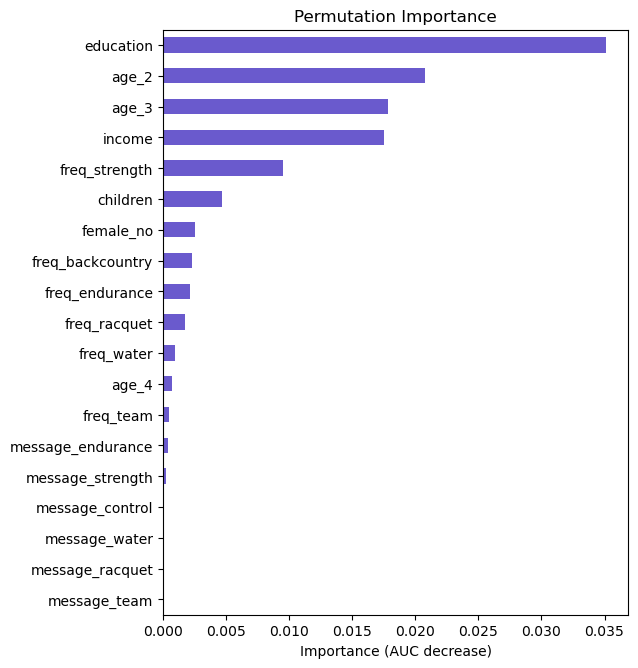

In [69]:
nn_t5 = nn.plot("vimp_sklearn", ret=True).index[0:5]

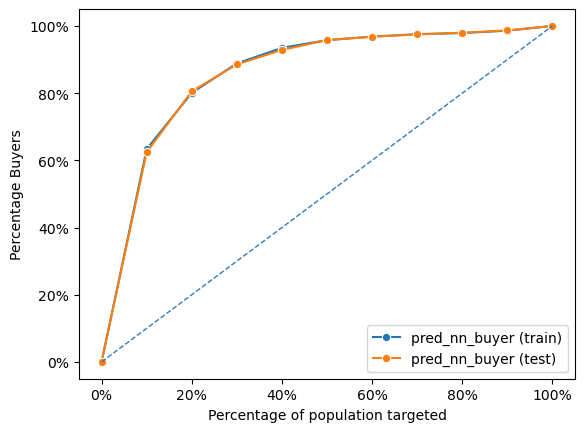

In [70]:
pentathlon_nptb['pred_nn_buyer'] = nn.predict(pentathlon_nptb)['prediction']
dct = {
    "train": pentathlon_nptb[pentathlon_nptb.training==1],
    "test": pentathlon_nptb[pentathlon_nptb.training==0]
}
fig = rsm.gains_plot(dct, rvar='buyer', lev='yes', pred='pred_nn_buyer')

In [71]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
import os

In [72]:
from itertools import product
import numpy as np

hls = []
for size in range(1,3):
    hls.extend(product(range(1,6), repeat=size))

param_grid = {
    'hidden_layer_sizes': hls,
    'alpha': np.arange(0, 1.1, 0.1),
}
scoring = {'AUC': 'roc_auc'}

In [73]:
cv_file = 'cv-objects/clf-nn-cv.pkl'
if os.path.exists(cv_file):
    cv_nn = rsm.load_state(cv_file)['cv_nn']
else:
    strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
    # Use RandomizedSearchCV instead of GridSearchCV
    cv_nn = RandomizedSearchCV(
        nn.fitted,
        param_grid,
        scoring=scoring,
        cv=strat_k_fold,
        n_jobs=-1,
        refit=list(scoring.keys())[0],
        verbose=3,  # Reduce verbosity to 3 for better tracking
        random_state=1234
    ).fit(nn.data_onehot, nn.data.buyer)
    if not os.path.exists('cv-objects'):
        os.mkdir('cv-objects')
    rsm.save_state({'cv_nn': cv_nn}, cv_file)

In [74]:
cv_nn.best_params_, cv_nn.best_score_

({'hidden_layer_sizes': (3, 4), 'alpha': 0.2}, 0.8898729290142173)

In [75]:
pd.DataFrame(cv_nn.cv_results_).sort_values('rank_test_AUC').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,param_alpha,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC
8,89.134211,3.243970,0.061872,0.005850,"(3, 4)",0.2,"{'hidden_layer_sizes': (3, 4), 'alpha': 0.2}",0.889923,0.889454,0.891001,0.890502,0.888486,0.889873,0.000868,1
0,95.297039,47.985972,0.113668,0.015021,"(3, 3)",0.4,"{'hidden_layer_sizes': (3, 3), 'alpha': 0.4}",0.889769,0.888798,0.890563,0.883333,0.883303,0.887153,0.003181,2
5,16.302039,8.103274,0.091625,0.008782,"(3,)",0.3,"{'hidden_layer_sizes': (3,), 'alpha': 0.300000...",0.887436,0.883238,0.887881,0.883420,0.883349,0.885065,0.002123,3
7,72.088380,8.059352,0.117854,0.044174,"(4, 4)",1.0,"{'hidden_layer_sizes': (4, 4), 'alpha': 1.0}",0.886183,0.882780,0.887422,0.884350,0.883375,0.884822,0.001738,4
9,16.513215,2.417154,0.081631,0.014456,"(4,)",0.3,"{'hidden_layer_sizes': (4,), 'alpha': 0.300000...",0.886223,0.883346,0.886779,0.884193,0.882620,0.884632,0.001615,5


In [76]:
nn_cv = rsm.model.mlp(
    data={'pentathlon_nptb': pentathlon_nptb.query('training == 1')},
    rvar='buyer',
    lev='yes',
    evar=evar,
    **cv_nn.best_params_
)
nn_cv.summary()

Multi-layer Perceptron (NN)
Data                 : pentathlon_nptb
Response variable    : buyer
Level                : yes
Explanatory variables: message, age, female, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Model type           : classification
Nr. of features      : (12, 19)
Nr. of weights       : 81
Nr. of observations  : 420,000
Hidden_layer_sizes   : (3, 4)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.2
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 1000000
random_state         : 1234
AUC                  : 0.891

Raw data             :
  message age female  income  education  children  freq_endurance  freq_strength  freq_water  freq_team  freq_backcountry  freq_racquet
     team   2     no   55000         19       0.8               0              4           0          4                 0             1
endurance   3    yes   45000        

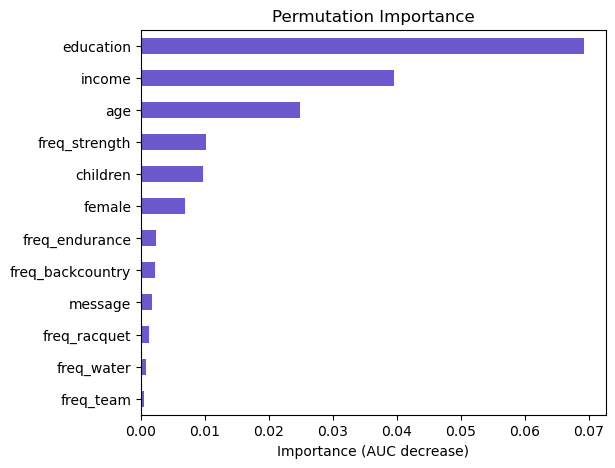

In [77]:
nn_cv_t5 = nn_cv.plot("vimp", ret=True).index[0:5]

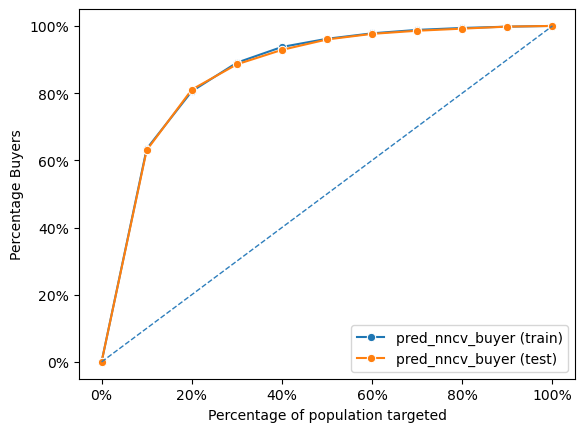

In [78]:
pentathlon_nptb['pred_nncv_buyer'] = nn_cv.predict(pentathlon_nptb)['prediction']
dct = {
    "train": pentathlon_nptb[pentathlon_nptb.training==1],
    "test": pentathlon_nptb[pentathlon_nptb.training==0]
}
fig = rsm.gains_plot(dct, rvar='buyer', lev='yes', pred='pred_nncv_buyer')

In [79]:
pentathlon_nptb["p_nn_back"] = nn_cv.predict(pentathlon_nptb, data_cmd={"message": "backcountry"})["prediction"]
pentathlon_nptb["p_nn_control"] = nn_cv.predict(pentathlon_nptb, data_cmd={"message": "control"})["prediction"]
pentathlon_nptb["p_nn_end"] = nn_cv.predict(pentathlon_nptb, data_cmd={"message": "endurance"})["prediction"]
pentathlon_nptb["p_nn_rac"] = nn_cv.predict(pentathlon_nptb, data_cmd={"message": "racquet"})["prediction"]
pentathlon_nptb["p_nn_str"] = nn_cv.predict(pentathlon_nptb, data_cmd={"message": "strength"})["prediction"]
pentathlon_nptb["p_nn_team"] = nn_cv.predict(pentathlon_nptb, data_cmd={"message": "team"})["prediction"]
pentathlon_nptb["p_nn_water"] = nn_cv.predict(pentathlon_nptb, data_cmd={"message": "water"})["prediction"]
pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,random_ep,pred_nn_buyer,pred_nncv_buyer,p_nn_back,p_nn_control,p_nn_end,p_nn_rac,p_nn_str,p_nn_team,p_nn_water
0,U1,no,0,team,2,no,55000,19,0.8,0,...,0.154953,0.012438,0.013566,0.012379,0.010056,0.010914,0.011192,0.013291,0.013566,0.012821
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,...,0.067727,0.003623,0.002221,0.002221,0.001812,0.001956,0.001856,0.002144,0.002517,0.002212
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,...,0.135412,0.009892,0.008012,0.006769,0.005796,0.008012,0.006163,0.007734,0.007326,0.007029
3,U20,no,0,water,3,yes,25000,24,0.2,0,...,0.020989,0.001449,0.000729,0.000681,0.000801,0.003004,0.000748,0.001023,0.000627,0.000729
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,...,0.146382,0.010817,0.008769,0.009639,0.007890,0.008553,0.008769,0.010352,0.010526,0.009984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,4,yes,40000,26,0.6,0,...,0.022584,0.001358,0.001398,0.001276,0.001601,0.005576,0.001421,0.002163,0.001130,0.001398
599996,U3462900,no,0,team,1,no,55000,32,0.9,3,...,0.090995,0.005533,0.005521,0.004851,0.003901,0.004113,0.004023,0.004850,0.005521,0.004875
599997,U3462902,no,0,team,1,yes,55000,32,0.9,0,...,0.149241,0.007333,0.003997,0.003415,0.002663,0.002427,0.002814,0.003106,0.003997,0.003366
599998,U3462916,no,0,team,1,no,50000,35,0.6,2,...,0.069467,0.004790,0.004143,0.003594,0.002854,0.002720,0.002949,0.003394,0.004143,0.003567


In [80]:
pentathlon_nptb["to_message_nn"] = pentathlon_nptb[["p_nn_back", "p_nn_control", "p_nn_end", "p_nn_rac", "p_nn_str", "p_nn_team", "p_nn_water"]].idxmax(axis=1) # what is the thing has highest probability to respond to
pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,pred_nn_buyer,pred_nncv_buyer,p_nn_back,p_nn_control,p_nn_end,p_nn_rac,p_nn_str,p_nn_team,p_nn_water,to_message_nn
0,U1,no,0,team,2,no,55000,19,0.8,0,...,0.012438,0.013566,0.012379,0.010056,0.010914,0.011192,0.013291,0.013566,0.012821,p_nn_team
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,...,0.003623,0.002221,0.002221,0.001812,0.001956,0.001856,0.002144,0.002517,0.002212,p_nn_team
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,...,0.009892,0.008012,0.006769,0.005796,0.008012,0.006163,0.007734,0.007326,0.007029,p_nn_end
3,U20,no,0,water,3,yes,25000,24,0.2,0,...,0.001449,0.000729,0.000681,0.000801,0.003004,0.000748,0.001023,0.000627,0.000729,p_nn_end
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,...,0.010817,0.008769,0.009639,0.007890,0.008553,0.008769,0.010352,0.010526,0.009984,p_nn_team
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,4,yes,40000,26,0.6,0,...,0.001358,0.001398,0.001276,0.001601,0.005576,0.001421,0.002163,0.001130,0.001398,p_nn_end
599996,U3462900,no,0,team,1,no,55000,32,0.9,3,...,0.005533,0.005521,0.004851,0.003901,0.004113,0.004023,0.004850,0.005521,0.004875,p_nn_team
599997,U3462902,no,0,team,1,yes,55000,32,0.9,0,...,0.007333,0.003997,0.003415,0.002663,0.002427,0.002814,0.003106,0.003997,0.003366,p_nn_team
599998,U3462916,no,0,team,1,no,50000,35,0.6,2,...,0.004790,0.004143,0.003594,0.002854,0.002720,0.002949,0.003394,0.004143,0.003567,p_nn_team


In [81]:
repl={"p_nn_back": "backcountry", "p_nn_control": "control", "p_nn_end": "endurance", "p_nn_rac": "racquet", "p_nn_str": "strength", "p_nn_team": "team", "p_nn_water": "water"}
pentathlon_nptb["to_message_nn"] = (
    pentathlon_nptb[["p_nn_back", "p_nn_control", "p_nn_end", "p_nn_rac", "p_nn_str", "p_nn_team", "p_nn_water"]]
    .idxmax(axis=1)
    .map(repl)
)
pentathlon_nptb["p_nn_max"] = pentathlon_nptb[["p_nn_back", "p_nn_control", "p_nn_end", "p_nn_rac", "p_nn_str", "p_nn_team", "p_nn_water"]].max(axis=1)
pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,pred_nncv_buyer,p_nn_back,p_nn_control,p_nn_end,p_nn_rac,p_nn_str,p_nn_team,p_nn_water,to_message_nn,p_nn_max
0,U1,no,0,team,2,no,55000,19,0.8,0,...,0.013566,0.012379,0.010056,0.010914,0.011192,0.013291,0.013566,0.012821,team,0.013566
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,...,0.002221,0.002221,0.001812,0.001956,0.001856,0.002144,0.002517,0.002212,team,0.002517
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,...,0.008012,0.006769,0.005796,0.008012,0.006163,0.007734,0.007326,0.007029,endurance,0.008012
3,U20,no,0,water,3,yes,25000,24,0.2,0,...,0.000729,0.000681,0.000801,0.003004,0.000748,0.001023,0.000627,0.000729,endurance,0.003004
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,...,0.008769,0.009639,0.007890,0.008553,0.008769,0.010352,0.010526,0.009984,team,0.010526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,4,yes,40000,26,0.6,0,...,0.001398,0.001276,0.001601,0.005576,0.001421,0.002163,0.001130,0.001398,endurance,0.005576
599996,U3462900,no,0,team,1,no,55000,32,0.9,3,...,0.005521,0.004851,0.003901,0.004113,0.004023,0.004850,0.005521,0.004875,team,0.005521
599997,U3462902,no,0,team,1,yes,55000,32,0.9,0,...,0.003997,0.003415,0.002663,0.002427,0.002814,0.003106,0.003997,0.003366,team,0.003997
599998,U3462916,no,0,team,1,no,50000,35,0.6,2,...,0.004143,0.003594,0.002854,0.002720,0.002949,0.003394,0.004143,0.003567,team,0.004143


To determine the probability of buyer against category under a MultiLayer Perception still holds the same principles as before, as it is necessary to develop a model that is effect on both seen and unseen data. From the base MLP, we saw the it performed as well as the logit model with interactions. Hence, just having 1 hidden layer and 1 node was sufficient to create a very strong model. However, we want to see if there is opportunity for improvement by adding more complexity to the MLP by capturing nonlinearities in the customer data. We saw that by adding more layers and nodes, adjusting the regularization term, we saw improvement of 0.01 in AUC. Moreover, we saw this tuned model also performed well on the unseen data, so there is no evidence of overfitting based off of the gains plot. The only key difference from now on, is that interactions do not have to be directly incorporated into the model as we will see tree models and MLPs directly captures the interactions that are beneficial to the model instead of using a brute force method like before.

## Q2

In [82]:
pd.crosstab(index=pentathlon_nptb[pentathlon_nptb.training == 0].to_message_nn, columns="count").apply(rsm.format_nr)

col_0,count
to_message_nn,
endurance,"95,099"
strength,"33,148"
team,"51,753"


In [83]:
pentathlon_nptb[pentathlon_nptb['training'] == 0]['to_message_nn'].value_counts(normalize=True)

to_message_nn
endurance    0.528328
team         0.287517
strength     0.184156
Name: proportion, dtype: float64

With a slightly stronger model, we see that there is very big difference in how the custom targeting scheme works now. Instead of having a diverse, selection of targeting, we see that to maximize a probability of purchase a large commitment to team. This is interesting as team is not seen to be a strong category on average. Nevertheless, there are some trends that still remain the same. Being able to target the best case category is still, on average, the best. Moreover, endurance is still a strong category and doing nothing is detrimental to increasing a probability of buying.

## Expected Profit

## Q3.

In [84]:
pentathlon_nptb['ep_backcountry_nn'] = pentathlon_nptb.pred_os_backcountry * pentathlon_nptb.p_nn_back * profit
pentathlon_nptb['ep_endurance_nn'] =  pentathlon_nptb.pred_os_endurance* pentathlon_nptb.p_nn_end * profit
pentathlon_nptb['ep_racquet_nn'] =  pentathlon_nptb.pred_os_racquet * pentathlon_nptb.p_nn_rac * profit
pentathlon_nptb['ep_strength_nn'] =  pentathlon_nptb.pred_os_strength * pentathlon_nptb.p_nn_str * profit
pentathlon_nptb['ep_team_nn'] =  pentathlon_nptb.pred_os_team * pentathlon_nptb.p_nn_team * profit
pentathlon_nptb['ep_water_nn'] =  pentathlon_nptb.pred_os_water * pentathlon_nptb.p_nn_water * profit
pentathlon_nptb['ep_control_nn'] =  pentathlon_nptb.pred_os_control * pentathlon_nptb.p_nn_control * profit
pentathlon_nptb.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,p_nn_water,to_message_nn,p_nn_max,ep_backcountry_nn,ep_endurance_nn,ep_racquet_nn,ep_strength_nn,ep_team_nn,ep_water_nn,ep_control_nn
0,U1,no,0,team,2,no,55000,19,0.8,0,...,0.012821,team,0.013566,0.131213,0.115164,0.119613,0.108872,0.145593,0.132909,0.086762
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,...,0.002212,team,0.002517,0.029289,0.020098,0.021452,0.021696,0.030195,0.028338,0.020893
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,...,0.007029,endurance,0.008012,0.121787,0.118109,0.099524,0.106139,0.126550,0.116859,0.085868
3,U20,no,0,water,3,yes,25000,24,0.2,0,...,0.000729,endurance,0.003004,0.007426,0.024584,0.006369,0.008057,0.006624,0.007099,0.007471
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,...,0.009984,team,0.010526,0.142939,0.121935,0.133369,0.132192,0.158735,0.162130,0.110918


To calculate expected profit, we still use the same method by considering the interaction between message and customer attribute. With the adjusted probabilities, we should still expect to see a shift in what optimal message in terms of expected profit.

## Q4

In [85]:
pentathlon_nptb['to_message_ep_nn'] = (
    pentathlon_nptb[['ep_backcountry_nn',	'ep_endurance_nn',	'ep_racquet_nn',	'ep_strength_nn',	'ep_team_nn',	'ep_water_nn', 'ep_control_nn']]
    .idxmax(axis=1)
    .str.replace('ep_backcountry_nn', 'backcountry')
    .replace('ep_endurance_nn', 'endurance')
    .replace('ep_racquet_nn', 'racquet')
    .replace('ep_strength_nn', 'strength')
    .replace('ep_team_nn', 'team')
    .replace('ep_water_nn', 'water')
    .replace('ep_control_nn', 'control')
)
pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,to_message_nn,p_nn_max,ep_backcountry_nn,ep_endurance_nn,ep_racquet_nn,ep_strength_nn,ep_team_nn,ep_water_nn,ep_control_nn,to_message_ep_nn
0,U1,no,0,team,2,no,55000,19,0.8,0,...,team,0.013566,0.131213,0.115164,0.119613,0.108872,0.145593,0.132909,0.086762,team
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,...,team,0.002517,0.029289,0.020098,0.021452,0.021696,0.030195,0.028338,0.020893,team
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,...,endurance,0.008012,0.121787,0.118109,0.099524,0.106139,0.126550,0.116859,0.085868,team
3,U20,no,0,water,3,yes,25000,24,0.2,0,...,endurance,0.003004,0.007426,0.024584,0.006369,0.008057,0.006624,0.007099,0.007471,endurance
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,...,team,0.010526,0.142939,0.121935,0.133369,0.132192,0.158735,0.162130,0.110918,water
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,4,yes,40000,26,0.6,0,...,endurance,0.005576,0.015643,0.057956,0.015849,0.019676,0.012928,0.017204,0.018390,endurance
599996,U3462900,no,0,team,1,no,55000,32,0.9,3,...,team,0.005521,0.058371,0.046453,0.044329,0.049745,0.054552,0.063975,0.043107,water
599997,U3462902,no,0,team,1,yes,55000,32,0.9,0,...,team,0.003997,0.039635,0.031928,0.034185,0.030319,0.044306,0.041919,0.027795,team
599998,U3462916,no,0,team,1,no,50000,35,0.6,2,...,team,0.004143,0.040197,0.028417,0.029202,0.032369,0.037358,0.042855,0.027939,water


In [86]:
repl={"ep_backcountry_nn": "backcountry", "ep_control_nn": "control", "ep_endurance_nn": "endurance", "ep_racquet_nn": "racquet", "ep_strength_nn": "strength", "ep_team_nn": "team", "ep_water_nn": "water"}
pentathlon_nptb["to_message_ep_nn"] = (
    pentathlon_nptb[["ep_backcountry_nn", "ep_control_nn", "ep_endurance_nn", "ep_racquet_nn", "ep_strength_nn", "ep_team_nn", "ep_water_nn"]]
    .idxmax(axis=1)
    .map(repl)
)
pentathlon_nptb["ep_max_nn"] = pentathlon_nptb[["ep_backcountry_nn", "ep_control_nn", "ep_endurance_nn", "ep_racquet_nn", "ep_strength_nn", "ep_team_nn", "ep_water_nn"]].max(axis=1)
pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,p_nn_max,ep_backcountry_nn,ep_endurance_nn,ep_racquet_nn,ep_strength_nn,ep_team_nn,ep_water_nn,ep_control_nn,to_message_ep_nn,ep_max_nn
0,U1,no,0,team,2,no,55000,19,0.8,0,...,0.013566,0.131213,0.115164,0.119613,0.108872,0.145593,0.132909,0.086762,team,0.145593
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,...,0.002517,0.029289,0.020098,0.021452,0.021696,0.030195,0.028338,0.020893,team,0.030195
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,...,0.008012,0.121787,0.118109,0.099524,0.106139,0.126550,0.116859,0.085868,team,0.126550
3,U20,no,0,water,3,yes,25000,24,0.2,0,...,0.003004,0.007426,0.024584,0.006369,0.008057,0.006624,0.007099,0.007471,endurance,0.024584
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,...,0.010526,0.142939,0.121935,0.133369,0.132192,0.158735,0.162130,0.110918,water,0.162130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,4,yes,40000,26,0.6,0,...,0.005576,0.015643,0.057956,0.015849,0.019676,0.012928,0.017204,0.018390,endurance,0.057956
599996,U3462900,no,0,team,1,no,55000,32,0.9,3,...,0.005521,0.058371,0.046453,0.044329,0.049745,0.054552,0.063975,0.043107,water,0.063975
599997,U3462902,no,0,team,1,yes,55000,32,0.9,0,...,0.003997,0.039635,0.031928,0.034185,0.030319,0.044306,0.041919,0.027795,team,0.044306
599998,U3462916,no,0,team,1,no,50000,35,0.6,2,...,0.004143,0.040197,0.028417,0.029202,0.032369,0.037358,0.042855,0.027939,water,0.042855


In [87]:
pd.crosstab(index = pentathlon_nptb.loc[(pentathlon_nptb.training == 0), "to_message_ep_nn"], columns = 'count').map(rsm.format_nr)

col_0,count
to_message_ep_nn,
backcountry,"6,463"
endurance,"85,530"
racquet,653
strength,"5,832"
team,"49,221"
water,"32,301"


As expected, we see a shift in what messages should be used to target based off expected profit. The adjusted probabilities and difference in margin across each category will create a shift. Mostly, we still see strong favor in team and endurance. One explanation between the difference between a Neural Net and Logit Model is that perhaps the logit model was too overzealous in attempting to determine what category is the best for each consumer. Although it may be relatively suspicious to believe that the "best" categories based off of probability to purchase gets shrunk into 3 from 7, the neural net model metrics and ability to perform on unseen data is a strong factor in favoring the Neural Net over the Logit model.

## Q5

In [88]:
ex_prof = pentathlon_nptb.loc[pentathlon_nptb.training == 0, 'ep_max_nn'].agg("mean").__round__(2)
print(f'Expected profit on average per customer if we customize the message to each customer, including no-message: ${ex_prof:.2f}')

Expected profit on average per customer if we customize the message to each customer, including no-message: $0.50


## Q6

In [89]:
pentathlon_nptb.loc[pentathlon_nptb.training == 0, ['ep_backcountry_nn', 'ep_endurance_nn', 'ep_racquet_nn', 'ep_strength_nn', 'ep_team_nn', 'ep_water_nn', 'ep_control_nn', 'ep_max_nn']].agg("mean").sort_values(
    ascending=False
).apply(rsm.format_nr, sym = "$", dec=2)

ep_max_nn             $0.5
ep_endurance_nn      $0.47
ep_water_nn          $0.45
ep_strength_nn       $0.44
ep_backcountry_nn    $0.43
ep_team_nn            $0.4
ep_racquet_nn         $0.4
ep_control_nn        $0.32
dtype: object

Relative to the logit model, we see a slight decrease in the what the expected profit is by targeting the "best" case category. Assuming there there a shifting in buyer probability (as seen in Q2) the expected profits change with respect to it. Nevertheless, the trends are still consistent in the sense that custom targeting is still the best and doing is the worst for profit and buyer probability. But, we see that across many categories, the overall level of profit is expected to go down with a neural net prediction model.

## Q7

In [90]:
message_nn = ['ep_backcountry_nn', 'ep_control_nn', 'ep_endurance_nn', 'ep_racquet_nn', 'ep_strength_nn', 'ep_team_nn', 'ep_water_nn']
pentathlon_nptb['random_ep_nn'] = pentathlon_nptb[message_nn].apply(lambda row: row[np.random.choice(message_nn)], axis=1)
ex_prof_random_nn = pentathlon_nptb.loc[pentathlon_nptb.training == 0, 'random_ep_nn'].agg("mean").__round__(2)
print(f'Expected profit on average per customer if we randomly send or do not send messages: ${ex_prof_random_nn:.2f}')

Expected profit on average per customer if we randomly send or do not send messages: $0.41


## Q8

In [91]:
# personalized approach
profit_nn_personal = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_max_nn"].agg("mean") * 5_000_000
print(f"Expected profit from offer customization: ${profit_nn_personal:,.2f}")

Expected profit from offer customization: $2,484,179.54


In [92]:
best_message_nn = pentathlon_nptb[["ep_backcountry_nn", "ep_endurance_nn", "ep_racquet_nn", "ep_strength_nn", "ep_team_nn", "ep_water_nn", "ep_control_nn"]].mean().idxmax()
best_message_nn

'ep_endurance_nn'

In [93]:
# (1) same message based on average performance
profit_nn_same_message = pentathlon_nptb.loc[pentathlon_nptb.training == 0, best_message_nn].mean() * 5_000_000
print(f"Expected profit from same message: ${profit_nn_same_message:,.2f}")

Expected profit from same message: $2,327,459.64


In [94]:
profit_nn_personal - profit_nn_same_message

156719.8990471065

In [95]:
(profit_nn_personal - profit_nn_same_message) / profit_nn_same_message

0.06733517362170058

In [96]:
# (2) randomly assigned
profit_nn_rand = pentathlon_nptb.loc[pentathlon_nptb.training == 0, 'random_ep_nn'].mean() * 5_000_000
print(f"Expected profit randomly assigned: ${profit_nn_rand:,.2f}")

Expected profit randomly assigned: $2,072,915.86


In [97]:
profit_nn_personal - profit_nn_rand

411263.6797918917

In [98]:
(profit_nn_personal - profit_nn_rand) / profit_nn_rand

0.19839863624463305

In [99]:
# (3) no message is sent (i.e., the control condition)
profit_nn_control = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_control_nn"].agg("mean") * 5_000_000
print(f"Expected profit without message: ${profit_nn_control:,.2f}")

Expected profit without message: $1,592,042.99


In [100]:
profit_nn_personal - profit_nn_control

892136.5542054621

In [101]:
(profit_nn_personal - profit_nn_control) / profit_nn_control

0.5603721519764718

We see under a neural net, that the percentage differences between a logit model creates an impact between the differences between custom messaging and other techniques. The trends remain the same as the control case performs the worst, random messaging is 2nd worst, and best department messaging is behind custom targeting. But as we see the probability to buy gets via the neural network, the expected profits decreases as well.

# Random Forest

## Q1

In [102]:
param_grid = {
    'max_features': [1,2,3,4,5],
    'n_estimators': np.arange(50, 650, 100),
}
scoring = {'AUC': 'roc_auc'}

In [103]:
rf = rsm.model.rforest(
    data={'pentathlon_nptb': pentathlon_nptb.query('training == 1')},
    rvar='buyer',
    lev='yes',
    evar=evar,
    max_features=2,
    n_estimators=50,
    min_samples_leaf=4,
    min_samples_split=4
)
rf.summary()

Random Forest
Data                 : pentathlon_nptb
Response variable    : buyer
Level                : yes
Explanatory variables: message, age, female, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
OOB                  : True
Model type           : classification
Nr. of features      : (12, 21)
Nr. of observations  : 420,000
max_features         : 2 (2)
n_estimators         : 50
min_samples_leaf     : 4
max_samples          : 1.0
random_state         : 1234
AUC                  : 0.854
Extra arguments      : min_samples_split=4

Estimation data      :
 income  education  children  freq_endurance  freq_strength  freq_water  freq_team  freq_backcountry  freq_racquet  message_backcountry  message_control  message_endurance  message_racquet  message_strength  message_team  message_water  age_1  age_2  age_3  age_4  female_no
  55000         19       0.8               0              4           0          4               

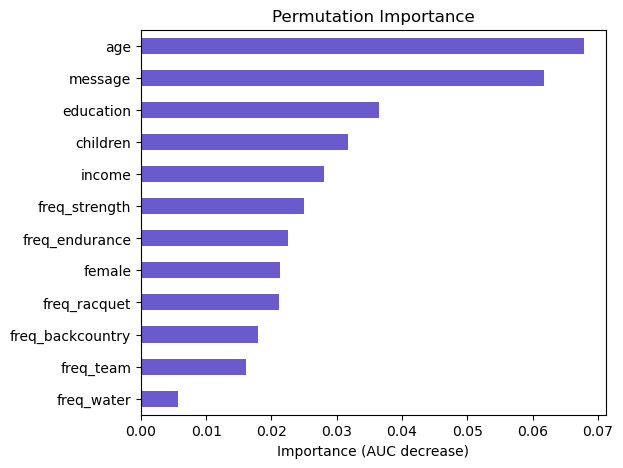

In [104]:
rf_t5 = rf.plot('vimp', ret=True).index[0:5]

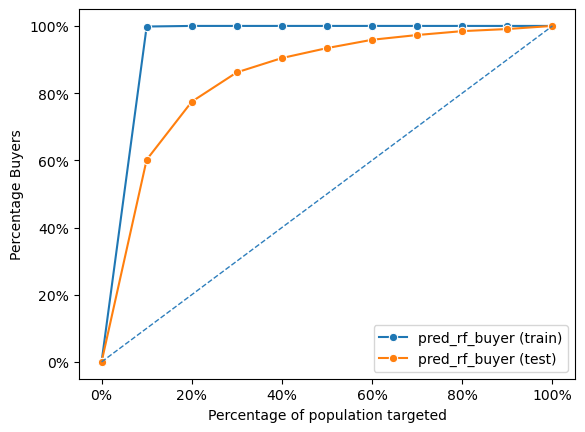

In [105]:
pentathlon_nptb['pred_rf_buyer'] = rf.predict(pentathlon_nptb)['prediction']
dct = {
    "train": pentathlon_nptb[pentathlon_nptb.training==1],
    "test": pentathlon_nptb[pentathlon_nptb.training==0]
}
fig = rsm.gains_plot(dct, rvar='buyer', lev='yes', pred='pred_rf_buyer')

In [106]:
cv_file = 'cv-objects/clf-rf-cv.pkl'
if os.path.exists(cv_file):
    cv_rf = rsm.load_state(cv_file)['cv_rf']
else:
    strat_k_fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1234)

    cv_rf = RandomizedSearchCV(
        rf.fitted,
        param_distributions=param_grid,  # Use param_distributions instead of param_grid
        scoring=scoring,
        cv=strat_k_fold,  # Use Stratified K-Fold
        n_jobs=-1,
        refit=list(scoring.keys())[0],
        verbose=3,  # Reduce verbosity for better tracking
        random_state=1234  # Ensures reproducibility
    ).fit(rf.data_onehot, rf.data.buyer)
    if not os.path.exists('cv-objects'):
        os.mkdir('cv-objects')
    rsm.save_state({'cv_rf': cv_rf}, cv_file)

In [107]:
cv_rf.best_params_, cv_rf.best_score_

({'n_estimators': 550, 'max_features': 4}, 0.8779341620955075)

In [108]:
pd.DataFrame(cv_rf.cv_results_).sort_values('rank_test_AUC').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC
7,129.380037,0.716522,9.760815,0.113016,550,4,"{'n_estimators': 550, 'max_features': 4}",0.879422,0.877134,0.877247,0.877934,0.001053,1
1,75.684260,0.615045,8.070436,0.235577,450,2,"{'n_estimators': 450, 'max_features': 2}",0.879472,0.876988,0.877280,0.877913,0.001109,2
8,48.919513,1.551216,4.118709,0.398093,250,3,"{'n_estimators': 250, 'max_features': 3}",0.878462,0.876025,0.877637,0.877375,0.001012,3
4,135.946903,4.966246,9.867202,1.359619,450,5,"{'n_estimators': 450, 'max_features': 5}",0.878055,0.875787,0.876621,0.876821,0.000936,4
5,47.763962,5.938684,4.562533,0.385143,250,2,"{'n_estimators': 250, 'max_features': 2}",0.878410,0.876328,0.875692,0.876810,0.001161,5


In [109]:
rf_cv = rsm.model.rforest(
    data={'pentathlon_nptb': pentathlon_nptb.query('training == 1')},
    rvar='buyer',
    lev='yes',
    evar=evar,
    n_jobs=-1,
    min_samples_leaf=4,
    min_samples_split=4,
    **cv_rf.best_params_
)
rf_cv.summary()

Random Forest
Data                 : pentathlon_nptb
Response variable    : buyer
Level                : yes
Explanatory variables: message, age, female, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
OOB                  : True
Model type           : classification
Nr. of features      : (12, 21)
Nr. of observations  : 420,000
max_features         : 4 (4)
n_estimators         : 550
min_samples_leaf     : 4
max_samples          : 1.0
random_state         : 1234
AUC                  : 0.876
Extra arguments      : n_jobs=-1, min_samples_split=4

Estimation data      :
 income  education  children  freq_endurance  freq_strength  freq_water  freq_team  freq_backcountry  freq_racquet  message_backcountry  message_control  message_endurance  message_racquet  message_strength  message_team  message_water  age_1  age_2  age_3  age_4  female_no
  55000         19       0.8               0              4           0          4   

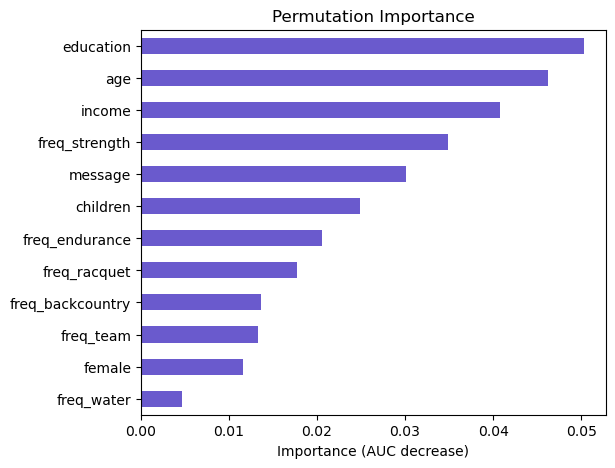

In [110]:
rf_cv_t5 = rf_cv.plot("vimp", ret=True).index[0:5]

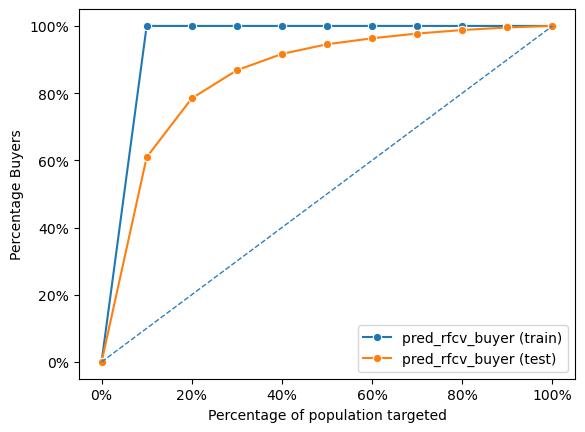

In [111]:
pentathlon_nptb['pred_rfcv_buyer'] = rf_cv.predict(pentathlon_nptb)['prediction']
dct = {
    "train": pentathlon_nptb[pentathlon_nptb.training==1],
    "test": pentathlon_nptb[pentathlon_nptb.training==0]
}
fig = rsm.gains_plot(dct, rvar='buyer', lev='yes', pred='pred_rfcv_buyer')

In [112]:
pentathlon_nptb["p_back_rf"] = rf_cv.predict(pentathlon_nptb, data_cmd={"message": "backcountry"})["prediction"]
pentathlon_nptb["p_control_rf"] = rf_cv.predict(pentathlon_nptb, data_cmd={"message": "control"})["prediction"]
pentathlon_nptb["p_end_rf"] = rf_cv.predict(pentathlon_nptb, data_cmd={"message": "endurance"})["prediction"]
pentathlon_nptb["p_rac_rf"] = rf_cv.predict(pentathlon_nptb, data_cmd={"message": "racquet"})["prediction"]
pentathlon_nptb["p_str_rf"] = rf_cv.predict(pentathlon_nptb, data_cmd={"message": "strength"})["prediction"]
pentathlon_nptb["p_team_rf"] = rf_cv.predict(pentathlon_nptb, data_cmd={"message": "team"})["prediction"]
pentathlon_nptb["p_water_rf"] = rf_cv.predict(pentathlon_nptb, data_cmd={"message": "water"})["prediction"]
pentathlon_nptb.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,random_ep_nn,pred_rf_buyer,pred_rfcv_buyer,p_back_rf,p_control_rf,p_end_rf,p_rac_rf,p_str_rf,p_team_rf,p_water_rf
0,U1,no,0,team,2,no,55000,19,0.8,0,...,0.115164,0.007193,0.009794,0.009518,0.007657,0.034698,0.007347,2.587119e-02,0.009794,0.016039
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,...,0.020098,0.000276,0.000012,0.000012,0.000013,0.000124,0.000017,2.201538e-04,0.000009,0.000113
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,...,0.106139,0.000347,0.003900,0.002857,0.006885,0.003900,0.007019,1.856828e-03,0.004944,0.000875
3,U20,no,0,water,3,yes,25000,24,0.2,0,...,0.007471,0.000185,0.000022,0.000114,0.000034,0.001108,0.000002,3.750375e-07,0.000005,0.000022
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,...,0.132192,0.016868,0.015269,0.019092,0.008985,0.004505,0.015269,1.014458e-02,0.009108,0.008638


In [113]:
pentathlon_nptb["to_message_rf"] = pentathlon_nptb[["p_back_rf", "p_control_rf", "p_end_rf", "p_rac_rf", "p_str_rf", "p_team_rf", "p_water_rf"]].idxmax(axis=1)
pentathlon_nptb.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,pred_rf_buyer,pred_rfcv_buyer,p_back_rf,p_control_rf,p_end_rf,p_rac_rf,p_str_rf,p_team_rf,p_water_rf,to_message_rf
0,U1,no,0,team,2,no,55000,19,0.8,0,...,0.007193,0.009794,0.009518,0.007657,0.034698,0.007347,2.587119e-02,0.009794,0.016039,p_end_rf
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,...,0.000276,0.000012,0.000012,0.000013,0.000124,0.000017,2.201538e-04,0.000009,0.000113,p_str_rf
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,...,0.000347,0.003900,0.002857,0.006885,0.003900,0.007019,1.856828e-03,0.004944,0.000875,p_rac_rf
3,U20,no,0,water,3,yes,25000,24,0.2,0,...,0.000185,0.000022,0.000114,0.000034,0.001108,0.000002,3.750375e-07,0.000005,0.000022,p_end_rf
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,...,0.016868,0.015269,0.019092,0.008985,0.004505,0.015269,1.014458e-02,0.009108,0.008638,p_back_rf


In [114]:
repl_rf={"p_back_rf": "backcountry", "p_control_rf": "control", "p_end_rf": "endurance", "p_rac_rf": "racquet", "p_str_rf": "strength", "p_team_rf": "team", "p_water_rf": "water"}
pentathlon_nptb["to_message_rf"] = (
    pentathlon_nptb[["p_back_rf", "p_control_rf", "p_end_rf", "p_rac_rf", "p_str_rf", "p_team_rf", "p_water_rf"]]
    .idxmax(axis=1)
    .map(repl_rf)
)
pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,pred_rf_buyer,pred_rfcv_buyer,p_back_rf,p_control_rf,p_end_rf,p_rac_rf,p_str_rf,p_team_rf,p_water_rf,to_message_rf
0,U1,no,0,team,2,no,55000,19,0.8,0,...,0.007193,0.009794,0.009518,0.007657,0.034698,0.007347,2.587119e-02,0.009794,0.016039,endurance
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,...,0.000276,0.000012,0.000012,0.000013,0.000124,0.000017,2.201538e-04,0.000009,0.000113,strength
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,...,0.000347,0.003900,0.002857,0.006885,0.003900,0.007019,1.856828e-03,0.004944,0.000875,racquet
3,U20,no,0,water,3,yes,25000,24,0.2,0,...,0.000185,0.000022,0.000114,0.000034,0.001108,0.000002,3.750375e-07,0.000005,0.000022,endurance
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,...,0.016868,0.015269,0.019092,0.008985,0.004505,0.015269,1.014458e-02,0.009108,0.008638,backcountry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,4,yes,40000,26,0.6,0,...,0.000374,0.000247,0.001867,0.000877,0.000529,0.000079,2.052693e-05,0.000003,0.000247,backcountry
599996,U3462900,no,0,team,1,no,55000,32,0.9,3,...,0.002857,0.001133,0.003282,0.000667,0.001258,0.002091,1.778835e-03,0.001133,0.000000,backcountry
599997,U3462902,no,0,team,1,yes,55000,32,0.9,0,...,0.001538,0.002893,0.007693,0.005357,0.004003,0.004696,4.127495e-03,0.002893,0.004518,backcountry
599998,U3462916,no,0,team,1,no,50000,35,0.6,2,...,0.001905,0.004419,0.001174,0.005630,0.001538,0.005025,1.900321e-03,0.004419,0.000773,control


In [115]:
pentathlon_nptb["p_max_rf"] = pentathlon_nptb[["p_back_rf", "p_control_rf", "p_end_rf", "p_rac_rf", "p_str_rf", "p_team_rf", "p_water_rf"]].max(axis=1)
pentathlon_nptb.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,pred_rfcv_buyer,p_back_rf,p_control_rf,p_end_rf,p_rac_rf,p_str_rf,p_team_rf,p_water_rf,to_message_rf,p_max_rf
0,U1,no,0,team,2,no,55000,19,0.8,0,...,0.009794,0.009518,0.007657,0.034698,0.007347,2.587119e-02,0.009794,0.016039,endurance,0.034698
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,...,0.000012,0.000012,0.000013,0.000124,0.000017,2.201538e-04,0.000009,0.000113,strength,0.000220
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,...,0.003900,0.002857,0.006885,0.003900,0.007019,1.856828e-03,0.004944,0.000875,racquet,0.007019
3,U20,no,0,water,3,yes,25000,24,0.2,0,...,0.000022,0.000114,0.000034,0.001108,0.000002,3.750375e-07,0.000005,0.000022,endurance,0.001108
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,...,0.015269,0.019092,0.008985,0.004505,0.015269,1.014458e-02,0.009108,0.008638,backcountry,0.019092


In [116]:
pd.crosstab(index=pentathlon_nptb[pentathlon_nptb.training == 0].to_message_rf, columns="count").apply(rsm.format_nr)

col_0,count
to_message_rf,
backcountry,"20,158"
control,"17,493"
endurance,"44,949"
racquet,"22,353"
strength,"30,426"
team,"23,087"
water,"21,534"


In [117]:
pentathlon_nptb[pentathlon_nptb['training'] == 0]['to_message_rf'].value_counts(normalize=True)

to_message_rf
endurance      0.249717
strength       0.169033
team           0.128261
racquet        0.124183
water          0.119633
backcountry    0.111989
control        0.097183
Name: proportion, dtype: float64

## Q3

In [118]:
pentathlon_nptb['ep_backcountry_rf'] = pentathlon_nptb.pred_os_backcountry * pentathlon_nptb.p_back_rf * profit
pentathlon_nptb['ep_endurance_rf'] =  pentathlon_nptb.pred_os_endurance* pentathlon_nptb.p_end_rf * profit
pentathlon_nptb['ep_racquet_rf'] =  pentathlon_nptb.pred_os_racquet * pentathlon_nptb.p_rac_rf * profit
pentathlon_nptb['ep_strength_rf'] =  pentathlon_nptb.pred_os_strength * pentathlon_nptb.p_str_rf * profit
pentathlon_nptb['ep_team_rf'] =  pentathlon_nptb.pred_os_team * pentathlon_nptb.p_team_rf * profit
pentathlon_nptb['ep_water_rf'] =  pentathlon_nptb.pred_os_water * pentathlon_nptb.p_water_rf * profit
pentathlon_nptb['ep_control_rf'] =  pentathlon_nptb.pred_os_control * pentathlon_nptb.p_control_rf * profit
pentathlon_nptb.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,p_water_rf,to_message_rf,p_max_rf,ep_backcountry_rf,ep_endurance_rf,ep_racquet_rf,ep_strength_rf,ep_team_rf,ep_water_rf,ep_control_rf
0,U1,no,0,team,2,no,55000,19,0.8,0,...,0.016039,endurance,0.034698,0.100893,0.366136,0.078518,0.211915,0.105111,0.166268,0.066061
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,...,0.000113,strength,0.000220,0.000159,0.001276,0.000194,0.002228,0.000104,0.001454,0.000152
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,...,0.000875,racquet,0.007019,0.051397,0.057497,0.113351,0.025482,0.085406,0.014545,0.102001
3,U20,no,0,water,3,yes,25000,24,0.2,0,...,0.000022,endurance,0.001108,0.001247,0.009072,0.000018,0.000003,0.000052,0.000214,0.000313
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,...,0.008638,backcountry,0.019092,0.283114,0.064224,0.232218,0.129548,0.137346,0.140285,0.126316


## Q4

In [119]:
pentathlon_nptb['to_message_ep_rf'] = (
    pentathlon_nptb[['ep_backcountry_rf',	'ep_endurance_rf',	'ep_racquet_rf',	'ep_strength_rf',	'ep_team_rf',	'ep_water_rf', 'ep_control_rf']]
    .idxmax(axis=1)
    .str.replace('ep_backcountry_rf', 'backcountry')
    .replace('ep_endurance_rf', 'endurance')
    .replace('ep_racquet_rf', 'racquet')
    .replace('ep_strength_rf', 'strength')
    .replace('ep_team_rf', 'team')
    .replace('ep_water_rf', 'water')
    .replace('ep_control_rf', 'control')
)
pentathlon_nptb.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,to_message_rf,p_max_rf,ep_backcountry_rf,ep_endurance_rf,ep_racquet_rf,ep_strength_rf,ep_team_rf,ep_water_rf,ep_control_rf,to_message_ep_rf
0,U1,no,0,team,2,no,55000,19,0.8,0,...,endurance,0.034698,0.100893,0.366136,0.078518,0.211915,0.105111,0.166268,0.066061,endurance
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,...,strength,0.000220,0.000159,0.001276,0.000194,0.002228,0.000104,0.001454,0.000152,strength
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,...,racquet,0.007019,0.051397,0.057497,0.113351,0.025482,0.085406,0.014545,0.102001,racquet
3,U20,no,0,water,3,yes,25000,24,0.2,0,...,endurance,0.001108,0.001247,0.009072,0.000018,0.000003,0.000052,0.000214,0.000313,endurance
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,...,backcountry,0.019092,0.283114,0.064224,0.232218,0.129548,0.137346,0.140285,0.126316,backcountry


In [120]:
repl={"ep_backcountry_rf": "backcountry", "ep_control_rf": "control", "ep_endurance_rf": "endurance", "ep_racquet_rf": "racquet", "ep_strength_rf": "strength", "ep_team_rf": "team", "ep_water_rf": "water"}
pentathlon_nptb["to_message_ep_rf"] = (
    pentathlon_nptb[["ep_backcountry_rf", "ep_control_rf", "ep_endurance_rf", "ep_racquet_rf", "ep_strength_rf", "ep_team_rf", "ep_water_rf"]]
    .idxmax(axis=1)
    .map(repl)
)
pentathlon_nptb["ep_max_rf"] = pentathlon_nptb[["ep_backcountry_rf", "ep_control_rf", "ep_endurance_rf", "ep_racquet_rf", "ep_strength_rf", "ep_team_rf", "ep_water_rf"]].max(axis=1)
pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,p_max_rf,ep_backcountry_rf,ep_endurance_rf,ep_racquet_rf,ep_strength_rf,ep_team_rf,ep_water_rf,ep_control_rf,to_message_ep_rf,ep_max_rf
0,U1,no,0,team,2,no,55000,19,0.8,0,...,0.034698,0.100893,0.366136,0.078518,0.211915,0.105111,0.166268,0.066061,endurance,0.366136
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,...,0.000220,0.000159,0.001276,0.000194,0.002228,0.000104,0.001454,0.000152,strength,0.002228
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,...,0.007019,0.051397,0.057497,0.113351,0.025482,0.085406,0.014545,0.102001,racquet,0.113351
3,U20,no,0,water,3,yes,25000,24,0.2,0,...,0.001108,0.001247,0.009072,0.000018,0.000003,0.000052,0.000214,0.000313,endurance,0.009072
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,...,0.019092,0.283114,0.064224,0.232218,0.129548,0.137346,0.140285,0.126316,backcountry,0.283114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,4,yes,40000,26,0.6,0,...,0.001867,0.022882,0.005496,0.000879,0.000187,0.000038,0.003042,0.010075,backcountry,0.022882
599996,U3462900,no,0,team,1,no,55000,32,0.9,3,...,0.003282,0.039494,0.014202,0.023045,0.018246,0.011199,0.000000,0.007371,backcountry,0.039494
599997,U3462902,no,0,team,1,yes,55000,32,0.9,0,...,0.007693,0.089295,0.052662,0.057041,0.040289,0.032074,0.056265,0.055912,backcountry,0.089295
599998,U3462916,no,0,team,1,no,50000,35,0.6,2,...,0.005630,0.013130,0.016070,0.049757,0.018123,0.039844,0.009282,0.055117,control,0.055117


In [121]:
pd.crosstab(index = pentathlon_nptb.loc[(pentathlon_nptb.training == 0), "to_message_ep_rf"], columns = 'count').map(rsm.format_nr)

col_0,count
to_message_ep_rf,
backcountry,"25,858"
control,"14,880"
endurance,"41,469"
racquet,"22,895"
strength,"21,836"
team,"24,468"
water,"28,594"


## Q5

In [122]:
ex_prof = pentathlon_nptb.loc[pentathlon_nptb.training == 0, 'ep_max_rf'].agg("mean").__round__(2)
print(f'Expected profit on average per customer if we customize the message to each customer, including no-message: ${ex_prof:.2f}')

Expected profit on average per customer if we customize the message to each customer, including no-message: $0.58


## Q6

In [123]:
pentathlon_nptb.loc[pentathlon_nptb.training == 0, ['ep_backcountry_rf', 'ep_endurance_rf', 'ep_racquet_rf', 'ep_strength_rf', 'ep_team_rf', 'ep_water_rf', 'ep_control_rf', 'ep_max_rf']].agg("mean").sort_values(
    ascending=False
).apply(rsm.format_nr, sym = "$", dec=2)

ep_max_rf            $0.58
ep_water_rf          $0.46
ep_endurance_rf      $0.45
ep_backcountry_rf    $0.45
ep_strength_rf       $0.43
ep_team_rf           $0.41
ep_racquet_rf        $0.41
ep_control_rf        $0.34
dtype: object

## Q7

In [124]:
message_rf = ['ep_backcountry_rf', 'ep_control_rf', 'ep_endurance_rf', 'ep_racquet_rf', 'ep_strength_rf', 'ep_team_rf', 'ep_water_rf']
pentathlon_nptb['random_ep_rf'] = pentathlon_nptb[message_rf].apply(lambda row: row[np.random.choice(message_rf)], axis=1)
ex_prof_random_rf = pentathlon_nptb.loc[pentathlon_nptb.training == 0, 'random_ep_rf'].agg("mean").__round__(2)
print(f'Expected profit on average per customer if we randomly send or do not send messages: ${ex_prof_random_rf:.2f}')

Expected profit on average per customer if we randomly send or do not send messages: $0.42


## Q8

In [125]:
# personalized approach
profit_rf_personal = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_max_rf"].agg("mean") * 5_000_000
print(f"Expected profit from offer customization: ${profit_rf_personal:,.2f}")

Expected profit from offer customization: $2,881,929.53


In [126]:
best_message_rf = pentathlon_nptb[["ep_backcountry_rf", "ep_endurance_rf", "ep_racquet_rf", "ep_strength_rf", "ep_team_rf", "ep_water_rf", "ep_control_rf"]].mean().idxmax()
best_message_rf

'ep_water_rf'

In [127]:
# (1) same message based on average performance
profit_rf_same_message = pentathlon_nptb.loc[pentathlon_nptb.training == 0, best_message_rf].mean() * 5_000_000
print(f"Expected profit from same message: ${profit_rf_same_message:,.2f}")

Expected profit from same message: $2,300,293.57


In [128]:
profit_rf_personal - profit_rf_same_message

581635.9519896503

In [129]:
(profit_rf_personal - profit_rf_same_message) / profit_rf_same_message

0.2528529222249983

In [130]:
# (2) randomly assigned
profit_rf_rand = pentathlon_nptb.loc[pentathlon_nptb.training == 0, 'random_ep_rf'].mean() * 5_000_000
print(f"Expected profit randomly assigned: ${profit_rf_rand:,.2f}")

Expected profit randomly assigned: $2,103,372.11


In [131]:
profit_rf_personal - profit_rf_rand

778557.4185207314

In [132]:
(profit_rf_personal - profit_rf_rand) / profit_rf_rand

0.3701472583036474

In [133]:
# (3) no message is sent (i.e., the control condition)
profit_rf_control = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_control_rf"].agg("mean") * 5_000_000
print(f"Expected profit without message: ${profit_rf_control:,.2f}")

Expected profit without message: $1,695,320.72


In [134]:
profit_rf_personal - profit_rf_control

1186608.8058597422

In [135]:
(profit_rf_personal - profit_rf_control) / profit_rf_control

0.6999317546498959

# XGBoost

## Q1.

In [136]:
param_grid = {
    'max_depth': list(range(1,8)),
    'n_estimators': np.arange(100, 600, 100),
    'min_child_weight': [1, 5, 10],
    'learning_rate': np.arange(0, 1, 0.2)
}
scoring = {'AUC': 'roc_auc'}

In [137]:
xg = rsm.model.xgboost(
    data={'pentathlon_nptb': pentathlon_nptb.query('training == 1')},
    rvar='buyer',
    lev='yes',
    evar=evar,
    n_estimators=100,
    max_depth=6,
    min_child_weight=1,
    learning_rate=0.3,
    random_state=1234
)
xg.summary()

XGBoost
Data                 : pentathlon_nptb
Response variable    : buyer
Level                : yes
Explanatory variables: message, age, female, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Model type           : classification
Nr. of features      : (12, 21)
Nr. of observations  : 420,000
n_estimators         : 100
max_depth            : 6
min_child_weight     : 1
learning_rate        : 0.3
subsample            : 1.0
colsample_bytree     : 1.0
random_state         : 1234
AUC                  : 0.913

Estimation data      :
 income  education  children  freq_endurance  freq_strength  freq_water  freq_team  freq_backcountry  freq_racquet  message_backcountry  message_control  message_endurance  message_racquet  message_strength  message_team  message_water  age_1  age_2  age_3  age_4  female_no
  55000         19       0.8               0              4           0          4                 0             1         

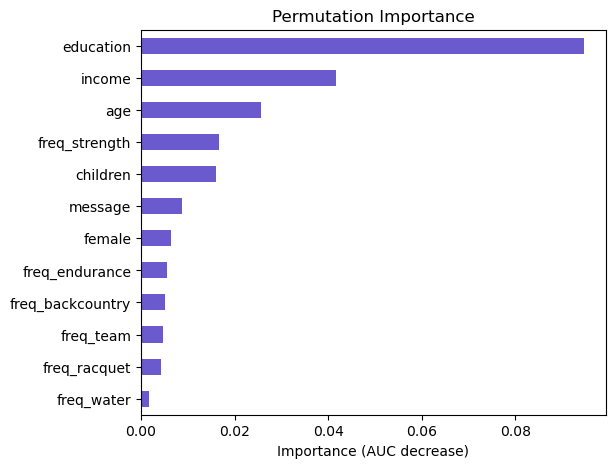

In [138]:
xg_t5 = xg.plot('vimp', ret=True).index[0:5]

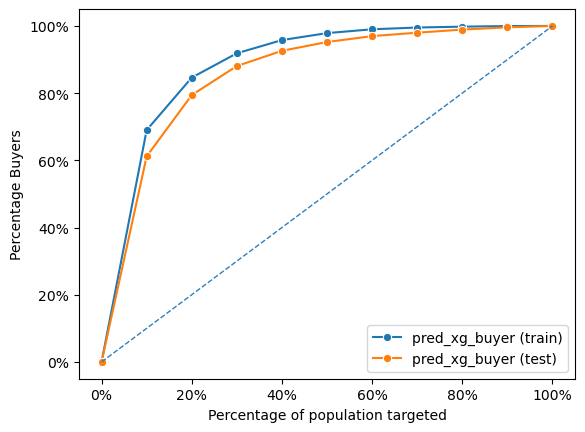

In [139]:
pentathlon_nptb['pred_xg_buyer'] = xg.predict(pentathlon_nptb)['prediction']
dct = {
    "train": pentathlon_nptb[pentathlon_nptb.training==1],
    "test": pentathlon_nptb[pentathlon_nptb.training==0]
}
fig = rsm.gains_plot(dct, rvar='buyer', lev='yes', pred='pred_xg_buyer')

In [140]:
cv_file = 'cv-objects/clf-xg-cv.pkl'

if os.path.exists(cv_file):
    cv_xg = rsm.load_state(cv_file)['cv_xg']
else:
    strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)

    # Initialize the GridSearchCV
    cv_xg = RandomizedSearchCV(
        xg.fitted,
        param_grid,
        scoring=scoring,
        cv=strat_k_fold,
        n_jobs=-1,
        refit=list(scoring.keys())[0],
        verbose=3
    ).fit(xg.data_onehot, xg.data.buyer)
    if not os.path.exists('cv-objects'):
        os.mkdir('cv-objects')
    rsm.save_state({'cv_xg': cv_xg}, cv_file)

# Get the best parameters and best score
best_params = cv_xg.best_params_
best_score = cv_xg.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Best Parameters: {'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.2}
Best Score: 0.8857595737805596


In [141]:
pd.DataFrame(cv_xg.cv_results_).sort_values('rank_test_AUC').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC
5,25.344278,0.563472,0.527812,0.066693,500,1,3,0.2,"{'n_estimators': 500, 'min_child_weight': 1, '...",0.887861,0.885089,0.885993,0.887062,0.882792,0.885760,0.001756,1
4,8.542994,0.969247,0.247011,0.039109,100,5,5,0.2,"{'n_estimators': 100, 'min_child_weight': 5, '...",0.887389,0.885298,0.885581,0.886765,0.883704,0.885747,0.001276,2
1,8.312950,1.304362,0.183693,0.044853,100,1,3,0.4,"{'n_estimators': 100, 'min_child_weight': 1, '...",0.887784,0.884240,0.885874,0.886509,0.882358,0.885353,0.001883,3
8,10.863913,1.140113,0.161377,0.011906,200,1,2,0.2,"{'n_estimators': 200, 'min_child_weight': 1, '...",0.886329,0.882901,0.885674,0.884928,0.881346,0.884236,0.001847,4
9,13.540114,0.703263,0.132887,0.017679,300,5,2,0.8,"{'n_estimators': 300, 'min_child_weight': 5, '...",0.886242,0.883389,0.884561,0.884107,0.881456,0.883951,0.001561,5


In [142]:
xg_optimized = rsm.model.xgboost(
    data={'pentathlon_nptb': pentathlon_nptb.query('training == 1')},
    rvar='buyer',
    lev='yes',
    evar=evar,
    **cv_xg.best_params_
)
xg_optimized.summary()

XGBoost
Data                 : pentathlon_nptb
Response variable    : buyer
Level                : yes
Explanatory variables: message, age, female, income, education, children, freq_endurance, freq_strength, freq_water, freq_team, freq_backcountry, freq_racquet
Model type           : classification
Nr. of features      : (12, 21)
Nr. of observations  : 420,000
n_estimators         : 500
max_depth            : 3
min_child_weight     : 1
learning_rate        : 0.2
subsample            : 1.0
colsample_bytree     : 1.0
random_state         : 1234
AUC                  : 0.897

Estimation data      :
 income  education  children  freq_endurance  freq_strength  freq_water  freq_team  freq_backcountry  freq_racquet  message_backcountry  message_control  message_endurance  message_racquet  message_strength  message_team  message_water  age_1  age_2  age_3  age_4  female_no
  55000         19       0.8               0              4           0          4                 0             1         

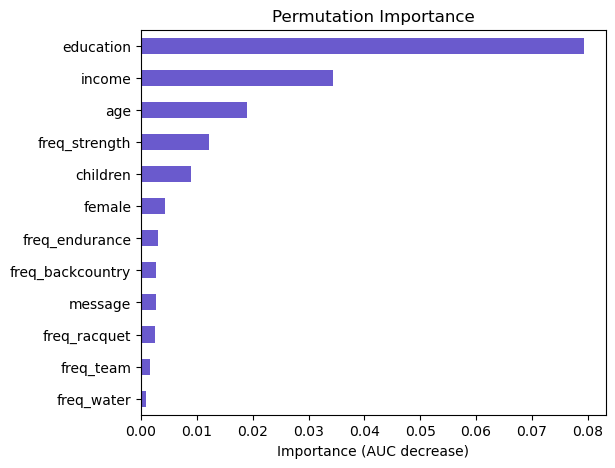

In [143]:
xg_optimized_t5 = xg_optimized.plot("vimp", ret=True).index[0:5]

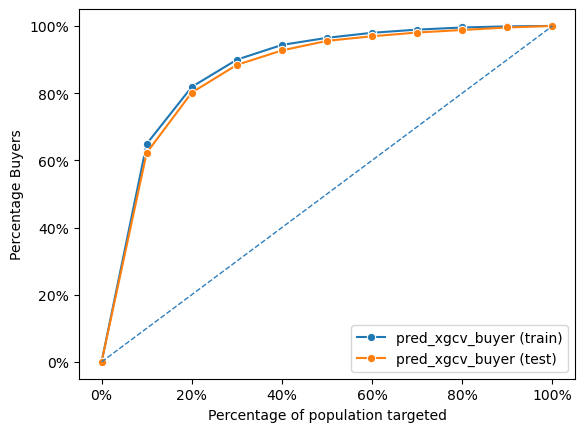

In [144]:
pentathlon_nptb['pred_xgcv_buyer'] = xg_optimized.predict(pentathlon_nptb)['prediction']
dct = {
    "train": pentathlon_nptb[pentathlon_nptb.training==1],
    "test": pentathlon_nptb[pentathlon_nptb.training==0]
}
fig = rsm.gains_plot(dct, rvar='buyer', lev='yes', pred='pred_xgcv_buyer')

In [145]:
pentathlon_nptb["p_back_xg"] = xg_optimized.predict(pentathlon_nptb, data_cmd={"message": "backcountry"})["prediction"]
pentathlon_nptb["p_control_xg"] = xg_optimized.predict(pentathlon_nptb, data_cmd={"message": "control"})["prediction"]
pentathlon_nptb["p_end_xg"] = xg_optimized.predict(pentathlon_nptb, data_cmd={"message": "endurance"})["prediction"]
pentathlon_nptb["p_rac_xg"] = xg_optimized.predict(pentathlon_nptb, data_cmd={"message": "racquet"})["prediction"]
pentathlon_nptb["p_str_xg"] = xg_optimized.predict(pentathlon_nptb, data_cmd={"message": "strength"})["prediction"]
pentathlon_nptb["p_team_xg"] = xg_optimized.predict(pentathlon_nptb, data_cmd={"message": "team"})["prediction"]
pentathlon_nptb["p_water_xg"] = xg_optimized.predict(pentathlon_nptb, data_cmd={"message": "water"})["prediction"]
pentathlon_nptb.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,random_ep_rf,pred_xg_buyer,pred_xgcv_buyer,p_back_xg,p_control_xg,p_end_xg,p_rac_xg,p_str_xg,p_team_xg,p_water_xg
0,U1,no,0,team,2,no,55000,19,0.8,0,...,0.078518,0.010216,0.007687,0.007266,0.006324,0.009172,0.007836,0.009731,0.007687,0.007847
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,...,0.001276,0.001000,0.001228,0.001228,0.001196,0.001961,0.001173,0.001230,0.001131,0.001206
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,...,0.057497,0.006351,0.009147,0.005722,0.006144,0.009147,0.005833,0.005490,0.006356,0.005608
3,U20,no,0,water,3,yes,25000,24,0.2,0,...,0.000052,0.000462,0.000760,0.001065,0.001071,0.003084,0.000890,0.000774,0.000940,0.000760
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,...,0.129548,0.010092,0.007721,0.007804,0.007084,0.009517,0.007721,0.008534,0.007740,0.007691


In [146]:
pentathlon_nptb["to_message_xg"] = pentathlon_nptb[["p_back_xg", "p_control_xg", "p_end_xg", "p_rac_xg", "p_str_xg", "p_team_xg", "p_water_xg"]].idxmax(axis=1)
pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,pred_xg_buyer,pred_xgcv_buyer,p_back_xg,p_control_xg,p_end_xg,p_rac_xg,p_str_xg,p_team_xg,p_water_xg,to_message_xg
0,U1,no,0,team,2,no,55000,19,0.8,0,...,0.010216,0.007687,0.007266,0.006324,0.009172,0.007836,0.009731,0.007687,0.007847,p_str_xg
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,...,0.001000,0.001228,0.001228,0.001196,0.001961,0.001173,0.001230,0.001131,0.001206,p_end_xg
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,...,0.006351,0.009147,0.005722,0.006144,0.009147,0.005833,0.005490,0.006356,0.005608,p_end_xg
3,U20,no,0,water,3,yes,25000,24,0.2,0,...,0.000462,0.000760,0.001065,0.001071,0.003084,0.000890,0.000774,0.000940,0.000760,p_end_xg
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,...,0.010092,0.007721,0.007804,0.007084,0.009517,0.007721,0.008534,0.007740,0.007691,p_end_xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,4,yes,40000,26,0.6,0,...,0.001192,0.000758,0.000963,0.001043,0.001752,0.000938,0.000958,0.000938,0.000758,p_end_xg
599996,U3462900,no,0,team,1,no,55000,32,0.9,3,...,0.003786,0.006111,0.005985,0.005278,0.006181,0.006064,0.006945,0.006111,0.005471,p_str_xg
599997,U3462902,no,0,team,1,yes,55000,32,0.9,0,...,0.005687,0.005413,0.005226,0.004769,0.005693,0.004967,0.006080,0.005413,0.005444,p_str_xg
599998,U3462916,no,0,team,1,no,50000,35,0.6,2,...,0.002581,0.003113,0.003335,0.003111,0.003345,0.003318,0.003811,0.003113,0.002712,p_str_xg


In [147]:
repl_xg={"p_back_xg": "backcountry", "p_control_xg": "control", "p_end_xg": "endurance", "p_rac_xg": "racquet", "p_str_xg": "strength", "p_team_xg": "team", "p_water_xg": "water"}
pentathlon_nptb["to_message_xg"] = (
    pentathlon_nptb[["p_back_xg", "p_control_xg", "p_end_xg", "p_rac_xg", "p_str_xg", "p_team_xg", "p_water_xg"]]
    .idxmax(axis=1)
    .map(repl_xg)
)
pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,pred_xg_buyer,pred_xgcv_buyer,p_back_xg,p_control_xg,p_end_xg,p_rac_xg,p_str_xg,p_team_xg,p_water_xg,to_message_xg
0,U1,no,0,team,2,no,55000,19,0.8,0,...,0.010216,0.007687,0.007266,0.006324,0.009172,0.007836,0.009731,0.007687,0.007847,strength
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,...,0.001000,0.001228,0.001228,0.001196,0.001961,0.001173,0.001230,0.001131,0.001206,endurance
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,...,0.006351,0.009147,0.005722,0.006144,0.009147,0.005833,0.005490,0.006356,0.005608,endurance
3,U20,no,0,water,3,yes,25000,24,0.2,0,...,0.000462,0.000760,0.001065,0.001071,0.003084,0.000890,0.000774,0.000940,0.000760,endurance
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,...,0.010092,0.007721,0.007804,0.007084,0.009517,0.007721,0.008534,0.007740,0.007691,endurance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,4,yes,40000,26,0.6,0,...,0.001192,0.000758,0.000963,0.001043,0.001752,0.000938,0.000958,0.000938,0.000758,endurance
599996,U3462900,no,0,team,1,no,55000,32,0.9,3,...,0.003786,0.006111,0.005985,0.005278,0.006181,0.006064,0.006945,0.006111,0.005471,strength
599997,U3462902,no,0,team,1,yes,55000,32,0.9,0,...,0.005687,0.005413,0.005226,0.004769,0.005693,0.004967,0.006080,0.005413,0.005444,strength
599998,U3462916,no,0,team,1,no,50000,35,0.6,2,...,0.002581,0.003113,0.003335,0.003111,0.003345,0.003318,0.003811,0.003113,0.002712,strength


In [148]:
pentathlon_nptb["p_max_xg"] = pentathlon_nptb[["p_back_xg", "p_control_xg", "p_end_xg", "p_rac_xg", "p_str_xg", "p_team_xg", "p_water_xg"]].max(axis=1)
pentathlon_nptb.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,pred_xgcv_buyer,p_back_xg,p_control_xg,p_end_xg,p_rac_xg,p_str_xg,p_team_xg,p_water_xg,to_message_xg,p_max_xg
0,U1,no,0,team,2,no,55000,19,0.8,0,...,0.007687,0.007266,0.006324,0.009172,0.007836,0.009731,0.007687,0.007847,strength,0.009731
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,...,0.001228,0.001228,0.001196,0.001961,0.001173,0.001230,0.001131,0.001206,endurance,0.001961
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,...,0.009147,0.005722,0.006144,0.009147,0.005833,0.005490,0.006356,0.005608,endurance,0.009147
3,U20,no,0,water,3,yes,25000,24,0.2,0,...,0.000760,0.001065,0.001071,0.003084,0.000890,0.000774,0.000940,0.000760,endurance,0.003084
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,...,0.007721,0.007804,0.007084,0.009517,0.007721,0.008534,0.007740,0.007691,endurance,0.009517


## Q2

In [149]:
pd.crosstab(index=pentathlon_nptb[pentathlon_nptb.training == 0].to_message_xg, columns="count").apply(rsm.format_nr)

col_0,count
to_message_xg,
backcountry,"1,632"
control,500
endurance,"115,789"
racquet,"1,460"
strength,"57,280"
team,712
water,"2,627"


In [150]:
pentathlon_nptb[pentathlon_nptb['training'] == 0]['to_message_xg'].value_counts(normalize=True)

to_message_xg
endurance      0.643272
strength       0.318222
water          0.014594
backcountry    0.009067
racquet        0.008111
team           0.003956
control        0.002778
Name: proportion, dtype: float64

## Q3

In [151]:
pentathlon_nptb['ep_backcountry_xg'] = pentathlon_nptb.pred_os_backcountry * pentathlon_nptb.p_back_xg * profit
pentathlon_nptb['ep_endurance_xg'] =  pentathlon_nptb.pred_os_endurance* pentathlon_nptb.p_end_xg * profit
pentathlon_nptb['ep_racquet_xg'] =  pentathlon_nptb.pred_os_racquet * pentathlon_nptb.p_rac_xg * profit
pentathlon_nptb['ep_strength_xg'] =  pentathlon_nptb.pred_os_strength * pentathlon_nptb.p_str_xg * profit
pentathlon_nptb['ep_team_xg'] =  pentathlon_nptb.pred_os_team * pentathlon_nptb.p_team_xg * profit
pentathlon_nptb['ep_water_xg'] =  pentathlon_nptb.pred_os_water * pentathlon_nptb.p_water_xg * profit
pentathlon_nptb['ep_control_xg'] =  pentathlon_nptb.pred_os_control * pentathlon_nptb.p_control_xg * profit
pentathlon_nptb.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,p_water_xg,to_message_xg,p_max_xg,ep_backcountry_xg,ep_endurance_xg,ep_racquet_xg,ep_strength_xg,ep_team_xg,ep_water_xg,ep_control_xg
0,U1,no,0,team,2,no,55000,19,0.8,0,...,0.007847,strength,0.009731,0.077020,0.096784,0.083750,0.079707,0.082494,0.081343,0.054561
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,...,0.001206,endurance,0.001961,0.016190,0.020145,0.013557,0.012454,0.013563,0.015449,0.013784
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,...,0.005608,endurance,0.009147,0.102942,0.134847,0.094204,0.075345,0.109788,0.093239,0.091024
3,U20,no,0,water,3,yes,25000,24,0.2,0,...,0.000760,endurance,0.003084,0.011611,0.025243,0.007583,0.006101,0.009933,0.007399,0.009988
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,...,0.007691,endurance,0.009517,0.115724,0.135681,0.117424,0.108983,0.116716,0.124892,0.099581


## Q4

In [152]:
pentathlon_nptb['to_message_ep_xg'] = (
    pentathlon_nptb[['ep_backcountry_xg',	'ep_endurance_xg',	'ep_racquet_xg',	'ep_strength_xg',	'ep_team_xg',	'ep_water_xg', 'ep_control_xg']]
    .idxmax(axis=1)
    .str.replace('ep_backcountry_xg', 'backcountry')
    .replace('ep_endurance_xg', 'endurance')
    .replace('ep_racquet_xg', 'racquet')
    .replace('ep_strength_xg', 'strength')
    .replace('ep_team_xg', 'team')
    .replace('ep_water_xg', 'water')
    .replace('ep_control_xg', 'control')
)
pentathlon_nptb.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,to_message_xg,p_max_xg,ep_backcountry_xg,ep_endurance_xg,ep_racquet_xg,ep_strength_xg,ep_team_xg,ep_water_xg,ep_control_xg,to_message_ep_xg
0,U1,no,0,team,2,no,55000,19,0.8,0,...,strength,0.009731,0.077020,0.096784,0.083750,0.079707,0.082494,0.081343,0.054561,endurance
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,...,endurance,0.001961,0.016190,0.020145,0.013557,0.012454,0.013563,0.015449,0.013784,endurance
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,...,endurance,0.009147,0.102942,0.134847,0.094204,0.075345,0.109788,0.093239,0.091024,endurance
3,U20,no,0,water,3,yes,25000,24,0.2,0,...,endurance,0.003084,0.011611,0.025243,0.007583,0.006101,0.009933,0.007399,0.009988,endurance
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,...,endurance,0.009517,0.115724,0.135681,0.117424,0.108983,0.116716,0.124892,0.099581,endurance


In [153]:
repl={"ep_backcountry_xg": "backcountry", "ep_control_xg": "control", "ep_endurance_xg": "endurance", "ep_racquet_xg": "racquet", "ep_strength_xg": "strength", "ep_team_xg": "team", "ep_water_xg": "water"}
pentathlon_nptb["to_message_ep_xg"] = (
    pentathlon_nptb[["ep_backcountry_xg", "ep_control_xg", "ep_endurance_xg", "ep_racquet_xg", "ep_strength_xg", "ep_team_xg", "ep_water_xg"]]
    .idxmax(axis=1)
    .map(repl)
)
pentathlon_nptb["ep_max_xg"] = pentathlon_nptb[["ep_backcountry_xg", "ep_control_xg", "ep_endurance_xg", "ep_racquet_xg", "ep_strength_xg", "ep_team_xg", "ep_water_xg"]].max(axis=1)
pentathlon_nptb.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,p_max_xg,ep_backcountry_xg,ep_endurance_xg,ep_racquet_xg,ep_strength_xg,ep_team_xg,ep_water_xg,ep_control_xg,to_message_ep_xg,ep_max_xg
0,U1,no,0,team,2,no,55000,19,0.8,0,...,0.009731,0.077020,0.096784,0.083750,0.079707,0.082494,0.081343,0.054561,endurance,0.096784
1,U3,no,0,backcountry,3,no,35000,22,1.0,0,...,0.001961,0.016190,0.020145,0.013557,0.012454,0.013563,0.015449,0.013784,endurance,0.020145
2,U13,no,0,endurance,3,yes,45000,33,0.7,0,...,0.009147,0.102942,0.134847,0.094204,0.075345,0.109788,0.093239,0.091024,endurance,0.134847
3,U20,no,0,water,3,yes,25000,24,0.2,0,...,0.003084,0.011611,0.025243,0.007583,0.006101,0.009933,0.007399,0.009988,endurance,0.025243
4,U25,no,0,racquet,4,yes,65000,32,1.1,1,...,0.009517,0.115724,0.135681,0.117424,0.108983,0.116716,0.124892,0.099581,endurance,0.135681


In [154]:
pd.crosstab(index = pentathlon_nptb.loc[(pentathlon_nptb.training == 0), "to_message_ep_xg"], columns = 'count').map(rsm.format_nr)

col_0,count
to_message_ep_xg,
backcountry,"19,423"
control,505
endurance,"116,875"
racquet,"3,301"
strength,"11,872"
team,"4,308"
water,"23,716"


## Q5

In [155]:
ex_prof = pentathlon_nptb.loc[pentathlon_nptb.training == 0, 'ep_max_xg'].agg("mean").__round__(2)
print(f'Expected profit on average per customer if we customize the message to each customer, including no-message: ${ex_prof:.2f}')

Expected profit on average per customer if we customize the message to each customer, including no-message: $0.51


## Q6

In [156]:
pentathlon_nptb.loc[pentathlon_nptb.training == 0, ['ep_backcountry_xg', 'ep_endurance_xg', 'ep_racquet_xg', 'ep_strength_xg', 'ep_team_xg', 'ep_water_xg', 'ep_control_xg', 'ep_max_xg']].agg("mean").sort_values(
    ascending=False
).apply(rsm.format_nr, sym = "$", dec=2)

ep_max_xg            $0.51
ep_endurance_xg      $0.47
ep_water_xg          $0.46
ep_strength_xg       $0.44
ep_backcountry_xg    $0.43
ep_team_xg            $0.4
ep_racquet_xg        $0.39
ep_control_xg        $0.32
dtype: object

## Q7

In [157]:
message_xg = ['ep_backcountry_xg', 'ep_control_xg', 'ep_endurance_xg', 'ep_racquet_xg', 'ep_strength_xg', 'ep_team_xg', 'ep_water_xg']
pentathlon_nptb['random_ep_xg'] = pentathlon_nptb[message_xg].apply(lambda row: row[np.random.choice(message_xg)], axis=1)
ex_prof_random_xg = pentathlon_nptb.loc[pentathlon_nptb.training == 0, 'random_ep_xg'].agg("mean").__round__(2)
print(f'Expected profit on average per customer if we randomly send or do not send messages: ${ex_prof_random_xg:.2f}')

Expected profit on average per customer if we randomly send or do not send messages: $0.41


## Q8

In [158]:
# personalized approach
profit_xg_personal = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_max_xg"].agg("mean") * 5_000_000
print(f"Expected profit from offer customization: ${profit_xg_personal:,.2f}")

Expected profit from offer customization: $2,554,513.77


In [159]:
best_message_xg = pentathlon_nptb[["ep_backcountry_xg", "ep_endurance_xg", "ep_racquet_xg", "ep_strength_xg", "ep_team_xg", "ep_water_xg", "ep_control_xg"]].mean().idxmax()
best_message_xg

'ep_endurance_xg'

In [160]:
# (1) same message based on average performance
profit_xg_same_message = pentathlon_nptb.loc[pentathlon_nptb.training == 0, best_message_xg].mean() * 5_000_000
print(f"Expected profit from same message: ${profit_xg_same_message:,.2f}")

Expected profit from same message: $2,341,848.63


In [161]:
profit_xg_personal - profit_xg_same_message

212665.1400566483

In [162]:
(profit_xg_personal - profit_xg_same_message) / profit_xg_same_message

0.09081079686800039

In [163]:
# (2) randomly assigned
profit_xg_rand = pentathlon_nptb.loc[pentathlon_nptb.training == 0, 'random_ep_xg'].mean() * 5_000_000
print(f"Expected profit randomly assigned: ${profit_xg_rand:,.2f}")

Expected profit randomly assigned: $2,074,800.54


In [164]:
profit_xg_personal - profit_xg_rand

479713.2282318752

In [165]:
(profit_xg_personal - profit_xg_rand) / profit_xg_rand

0.23120932302383154

In [166]:
# (3) no message is sent (i.e., the control condition)
profit_xg_control = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_control_xg"].agg("mean") * 5_000_000
print(f"Expected profit without message: ${profit_xg_control:,.2f}")

Expected profit without message: $1,576,452.76


In [167]:
profit_xg_personal - profit_xg_control

978061.0068803553

In [168]:
(profit_xg_personal - profit_xg_control) / profit_xg_control

0.6204188485324763

## Summary Charts

In [169]:
custom_profits = [profit_logit_personal, profit_nn_personal, profit_rf_personal, profit_xg_personal]
models = ['logit', 'nn', 'rf', 'xg']

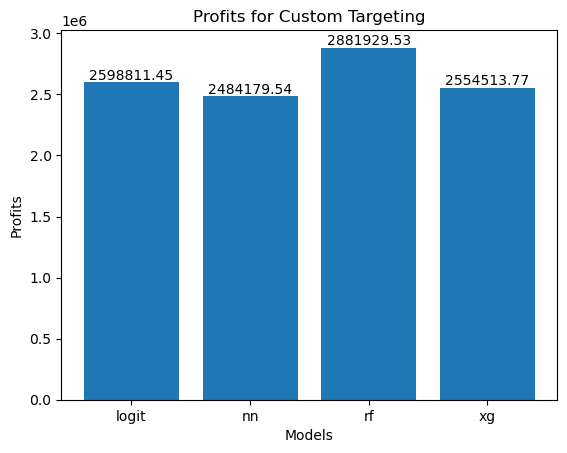

In [170]:
import matplotlib.pyplot as plt

bars = plt.bar(models, custom_profits)
plt.title('Profits for Custom Targeting')
plt.xlabel('Models')
plt.ylabel('Profits')

# Add labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

# Part 2: Comments on the New Policy Proposal Draft

1. Promotional Emails will be allocated to departments on a monthly basis.

Having email allocations based off of profit or probability of buyer is a valid method of allocating marketing budget. We have seen across all of our models that customization how the firm sends out messages is a good tactic. Depending on the firm's priorities, the models can capture two things:
* Maximum probability of buying
* Maximum Expected Profit 

To ensure that potential customers are getting the right messages and the firm is doing the utmost effort to maximize their KPIs, it is key for the firm to properly allocate their emails instead of committing their eggs all in one basket or randomly sending out messages.

2. During each month, emails will be assigned to department as follows: \
    a. For each customer, analytics team determines two messages that yield highest profits \
    b. Two departments that yield highest expected profit are allowed to each control half of the messages that are sent out to this person during that month

This does not seem overly outrageous of a tactic to implement. However, there are some considerations that must be viewed.
* There is no guarantee that the second highest department will create a purchase. Hence, there may be arbitrary opportunity costs that are being creating every single time the second best department is sending out a message. Moreover, there is a good chance that the second best case may not be close to the best case, or relatively differentiable to the other departments. To maximize profit, it is probably the best to commit the best message every single time. One thing to consider is variable importance across each of the models that were created. The most important variables tend to be hard demographic features such as education, income, and age. These do not frequently shift over time. So even across 1 month, we should expect the best case department to still remain the best case.

This directly leads us into the last point in the draft.

3. During the last week of each month, the analytics team uses the data from the emails sent during the first three weeks and repeats step 2.

Returning back the considerations highlighted in point 2, we need to recognize that the the most important variables from our tuned models are hard demographic features. Not the frequency of buying from a certain department or the message that was sent out. Hence, it is very likely that after collecting data for 1 month and creating these new analysis models again, the same result will be told month after month. Nevertheless, it may be worth checking in yearly, when demographic features may change. Overall, regardless of what these results produce, it the firm should commit to the best case department time after time.